In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# data frame
df = pd.read_csv('../server/src/csv/nz.csv', header=1)
df = df.rename(columns={"Unnamed: 0":"date", "last_price":"close"})

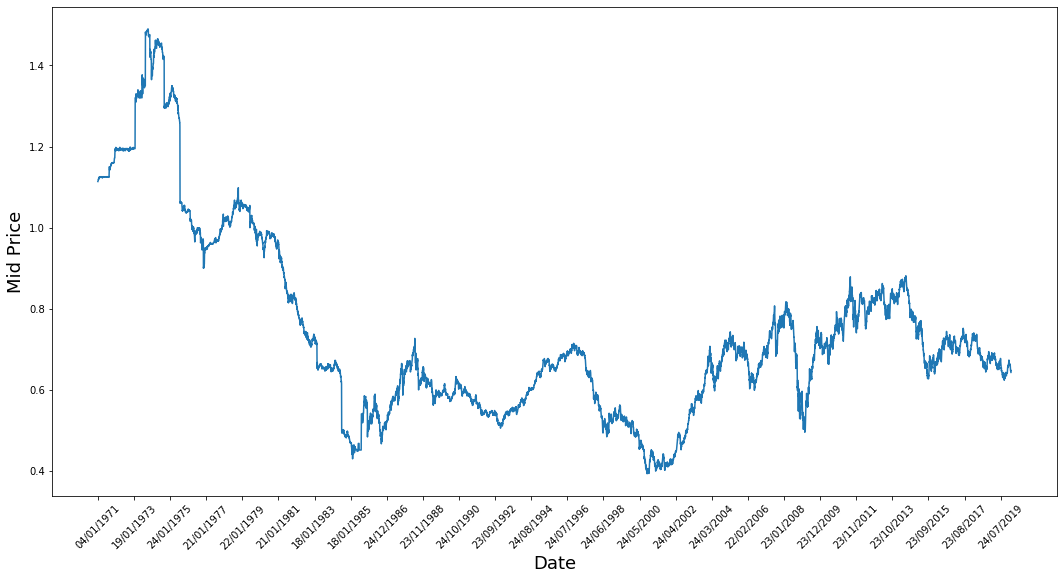

In [3]:
plt.figure(figsize = (18,9))
# plot mid price
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [4]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
print(mid_prices)

[1.1138 1.1143 1.1151 ... 0.6486 0.6469 0.6431]


(11000, 1)


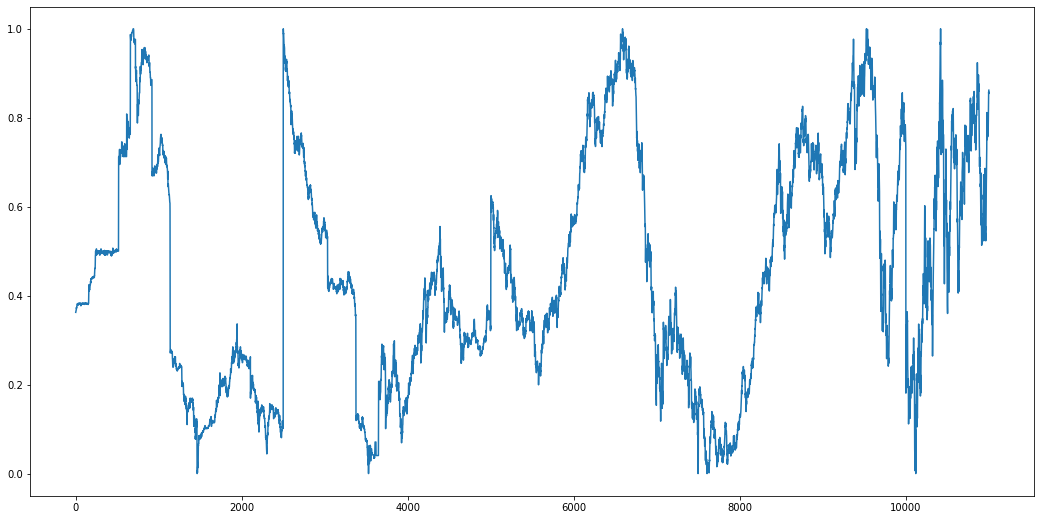

In [5]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    
# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

plt.figure(figsize = (18,9))
plt.plot(train_data)
print(train_data.shape)

In [6]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

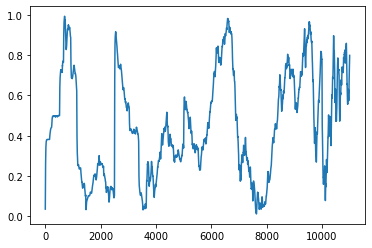

In [7]:
plt.plot(train_data)
train_data = train_data.reshape(11000, 1)

In [8]:
generator = TimeseriesGenerator(train_data, train_data, length=30, batch_size=1)
print(len(generator))

10970


In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=20, return_sequences=False, activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

model.fit_generator(generator, steps_per_epoch=1, epochs=10970, verbose=2)

Epoch 1/10970
1/1 - 1s - loss: 0.1631
Epoch 2/10970
1/1 - 0s - loss: 0.0880
Epoch 3/10970
1/1 - 0s - loss: 0.7725
Epoch 4/10970
1/1 - 0s - loss: 0.5205
Epoch 5/10970
1/1 - 0s - loss: 0.4120
Epoch 6/10970
1/1 - 0s - loss: 0.4364
Epoch 7/10970
1/1 - 0s - loss: 0.5241
Epoch 8/10970
1/1 - 0s - loss: 0.5875
Epoch 9/10970
1/1 - 0s - loss: 0.4264
Epoch 10/10970
1/1 - 0s - loss: 0.0057
Epoch 11/10970
1/1 - 0s - loss: 0.3098
Epoch 12/10970
1/1 - 0s - loss: 0.5010
Epoch 13/10970
1/1 - 0s - loss: 0.4960
Epoch 14/10970
1/1 - 0s - loss: 0.1344
Epoch 15/10970
1/1 - 0s - loss: 0.1473
Epoch 16/10970
1/1 - 0s - loss: 0.3049
Epoch 17/10970
1/1 - 0s - loss: 0.1683
Epoch 18/10970
1/1 - 0s - loss: 0.0088
Epoch 19/10970
1/1 - 0s - loss: 0.2096
Epoch 20/10970
1/1 - 0s - loss: 0.3976
Epoch 21/10970
1/1 - 0s - loss: 0.4092
Epoch 22/10970
1/1 - 0s - loss: 0.0487
Epoch 23/10970
1/1 - 0s - loss: 0.2961
Epoch 24/10970
1/1 - 0s - loss: 0.2778
Epoch 25/10970
1/1 - 0s - loss: 0.0440
Epoch 26/10970
1/1 - 0s - loss: 0.

Epoch 208/10970
1/1 - 0s - loss: 0.0103
Epoch 209/10970
1/1 - 0s - loss: 0.0363
Epoch 210/10970
1/1 - 0s - loss: 0.0223
Epoch 211/10970
1/1 - 0s - loss: 0.0557
Epoch 212/10970
1/1 - 0s - loss: 0.0117
Epoch 213/10970
1/1 - 0s - loss: 0.0103
Epoch 214/10970
1/1 - 0s - loss: 0.0446
Epoch 215/10970
1/1 - 0s - loss: 0.0211
Epoch 216/10970
1/1 - 0s - loss: 0.0258
Epoch 217/10970
1/1 - 0s - loss: 0.0031
Epoch 218/10970
1/1 - 0s - loss: 0.0636
Epoch 219/10970
1/1 - 0s - loss: 0.0236
Epoch 220/10970
1/1 - 0s - loss: 0.0146
Epoch 221/10970
1/1 - 0s - loss: 0.0255
Epoch 222/10970
1/1 - 0s - loss: 0.0593
Epoch 223/10970
1/1 - 0s - loss: 0.0642
Epoch 224/10970
1/1 - 0s - loss: 0.0119
Epoch 225/10970
1/1 - 0s - loss: 0.0506
Epoch 226/10970
1/1 - 0s - loss: 0.0145
Epoch 227/10970
1/1 - 0s - loss: 0.0316
Epoch 228/10970
1/1 - 0s - loss: 0.0093
Epoch 229/10970
1/1 - 0s - loss: 0.0465
Epoch 230/10970
1/1 - 0s - loss: 0.0172
Epoch 231/10970
1/1 - 0s - loss: 0.0244
Epoch 232/10970
1/1 - 0s - loss: 0.0486


1/1 - 0s - loss: 0.0124
Epoch 413/10970
1/1 - 0s - loss: 0.0388
Epoch 414/10970
1/1 - 0s - loss: 0.0237
Epoch 415/10970
1/1 - 0s - loss: 0.0076
Epoch 416/10970
1/1 - 0s - loss: 0.0136
Epoch 417/10970
1/1 - 0s - loss: 0.0011
Epoch 418/10970
1/1 - 0s - loss: 0.0038
Epoch 419/10970
1/1 - 0s - loss: 0.0033
Epoch 420/10970
1/1 - 0s - loss: 0.0271
Epoch 421/10970
1/1 - 0s - loss: 0.0046
Epoch 422/10970
1/1 - 0s - loss: 0.0131
Epoch 423/10970
1/1 - 0s - loss: 0.0246
Epoch 424/10970
1/1 - 0s - loss: 0.0291
Epoch 425/10970
1/1 - 0s - loss: 0.0312
Epoch 426/10970
1/1 - 0s - loss: 0.0283
Epoch 427/10970
1/1 - 0s - loss: 0.0098
Epoch 428/10970
1/1 - 0s - loss: 0.0291
Epoch 429/10970
1/1 - 0s - loss: 0.0276
Epoch 430/10970
1/1 - 0s - loss: 0.0271
Epoch 431/10970
1/1 - 0s - loss: 3.9691e-04
Epoch 432/10970
1/1 - 0s - loss: 0.0156
Epoch 433/10970
1/1 - 0s - loss: 0.0350
Epoch 434/10970
1/1 - 0s - loss: 0.0143
Epoch 435/10970
1/1 - 0s - loss: 0.0011
Epoch 436/10970
1/1 - 0s - loss: 0.0015
Epoch 437/10

Epoch 617/10970
1/1 - 0s - loss: 0.0044
Epoch 618/10970
1/1 - 0s - loss: 0.0394
Epoch 619/10970
1/1 - 0s - loss: 0.0201
Epoch 620/10970
1/1 - 0s - loss: 0.0112
Epoch 621/10970
1/1 - 0s - loss: 0.0101
Epoch 622/10970
1/1 - 0s - loss: 0.0205
Epoch 623/10970
1/1 - 0s - loss: 0.0198
Epoch 624/10970
1/1 - 0s - loss: 0.0141
Epoch 625/10970
1/1 - 0s - loss: 0.0014
Epoch 626/10970
1/1 - 0s - loss: 0.0089
Epoch 627/10970
1/1 - 0s - loss: 0.0055
Epoch 628/10970
1/1 - 0s - loss: 0.0040
Epoch 629/10970
1/1 - 0s - loss: 0.0084
Epoch 630/10970
1/1 - 0s - loss: 0.0141
Epoch 631/10970
1/1 - 0s - loss: 0.0052
Epoch 632/10970
1/1 - 0s - loss: 6.1952e-04
Epoch 633/10970
1/1 - 0s - loss: 0.0099
Epoch 634/10970
1/1 - 0s - loss: 0.0014
Epoch 635/10970
1/1 - 0s - loss: 0.0269
Epoch 636/10970
1/1 - 0s - loss: 0.0241
Epoch 637/10970
1/1 - 0s - loss: 0.0175
Epoch 638/10970
1/1 - 0s - loss: 0.0272
Epoch 639/10970
1/1 - 0s - loss: 0.0198
Epoch 640/10970
1/1 - 0s - loss: 0.0136
Epoch 641/10970
1/1 - 0s - loss: 0.0

Epoch 821/10970
1/1 - 0s - loss: 0.0307
Epoch 822/10970
1/1 - 0s - loss: 0.0188
Epoch 823/10970
1/1 - 0s - loss: 0.0116
Epoch 824/10970
1/1 - 0s - loss: 9.2342e-05
Epoch 825/10970
1/1 - 0s - loss: 0.0021
Epoch 826/10970
1/1 - 0s - loss: 0.0322
Epoch 827/10970
1/1 - 0s - loss: 0.0142
Epoch 828/10970
1/1 - 0s - loss: 0.0517
Epoch 829/10970
1/1 - 0s - loss: 0.0066
Epoch 830/10970
1/1 - 0s - loss: 0.0810
Epoch 831/10970
1/1 - 0s - loss: 0.0037
Epoch 832/10970
1/1 - 0s - loss: 0.0557
Epoch 833/10970
1/1 - 0s - loss: 0.0052
Epoch 834/10970
1/1 - 0s - loss: 0.0450
Epoch 835/10970
1/1 - 0s - loss: 0.0376
Epoch 836/10970
1/1 - 0s - loss: 0.0106
Epoch 837/10970
1/1 - 0s - loss: 0.0226
Epoch 838/10970
1/1 - 0s - loss: 0.0033
Epoch 839/10970
1/1 - 0s - loss: 0.0208
Epoch 840/10970
1/1 - 0s - loss: 0.0396
Epoch 841/10970
1/1 - 0s - loss: 0.0033
Epoch 842/10970
1/1 - 0s - loss: 0.0205
Epoch 843/10970
1/1 - 0s - loss: 0.0274
Epoch 844/10970
1/1 - 0s - loss: 6.9094e-04
Epoch 845/10970
1/1 - 0s - loss:

Epoch 1025/10970
1/1 - 0s - loss: 0.0028
Epoch 1026/10970
1/1 - 0s - loss: 0.0102
Epoch 1027/10970
1/1 - 0s - loss: 0.0030
Epoch 1028/10970
1/1 - 0s - loss: 0.0025
Epoch 1029/10970
1/1 - 0s - loss: 0.0058
Epoch 1030/10970
1/1 - 0s - loss: 0.0056
Epoch 1031/10970
1/1 - 0s - loss: 0.0186
Epoch 1032/10970
1/1 - 0s - loss: 0.0027
Epoch 1033/10970
1/1 - 0s - loss: 0.0060
Epoch 1034/10970
1/1 - 0s - loss: 0.0051
Epoch 1035/10970
1/1 - 0s - loss: 0.0602
Epoch 1036/10970
1/1 - 0s - loss: 0.0023
Epoch 1037/10970
1/1 - 0s - loss: 6.8280e-04
Epoch 1038/10970
1/1 - 0s - loss: 0.0053
Epoch 1039/10970
1/1 - 0s - loss: 0.0037
Epoch 1040/10970
1/1 - 0s - loss: 0.0067
Epoch 1041/10970
1/1 - 0s - loss: 4.5102e-05
Epoch 1042/10970
1/1 - 0s - loss: 0.0094
Epoch 1043/10970
1/1 - 0s - loss: 0.0013
Epoch 1044/10970
1/1 - 0s - loss: 0.0015
Epoch 1045/10970
1/1 - 0s - loss: 7.9572e-04
Epoch 1046/10970
1/1 - 0s - loss: 0.0223
Epoch 1047/10970
1/1 - 0s - loss: 0.0031
Epoch 1048/10970
1/1 - 0s - loss: 0.0072
Epoc

Epoch 1224/10970
1/1 - 0s - loss: 0.0144
Epoch 1225/10970
1/1 - 0s - loss: 0.0164
Epoch 1226/10970
1/1 - 0s - loss: 0.0185
Epoch 1227/10970
1/1 - 0s - loss: 0.0098
Epoch 1228/10970
1/1 - 0s - loss: 0.0062
Epoch 1229/10970
1/1 - 0s - loss: 0.0076
Epoch 1230/10970
1/1 - 0s - loss: 0.0160
Epoch 1231/10970
1/1 - 0s - loss: 0.0042
Epoch 1232/10970
1/1 - 0s - loss: 0.0053
Epoch 1233/10970
1/1 - 0s - loss: 0.0045
Epoch 1234/10970
1/1 - 0s - loss: 0.0017
Epoch 1235/10970
1/1 - 0s - loss: 0.0020
Epoch 1236/10970
1/1 - 0s - loss: 6.2467e-04
Epoch 1237/10970
1/1 - 0s - loss: 0.0073
Epoch 1238/10970
1/1 - 0s - loss: 0.0083
Epoch 1239/10970
1/1 - 0s - loss: 0.0097
Epoch 1240/10970
1/1 - 0s - loss: 0.0033
Epoch 1241/10970
1/1 - 0s - loss: 0.0178
Epoch 1242/10970
1/1 - 0s - loss: 0.0088
Epoch 1243/10970
1/1 - 0s - loss: 0.0190
Epoch 1244/10970
1/1 - 0s - loss: 0.0068
Epoch 1245/10970
1/1 - 0s - loss: 0.0096
Epoch 1246/10970
1/1 - 0s - loss: 0.0079
Epoch 1247/10970
1/1 - 0s - loss: 0.0019
Epoch 1248/1

Epoch 1423/10970
1/1 - 0s - loss: 0.0089
Epoch 1424/10970
1/1 - 0s - loss: 0.0110
Epoch 1425/10970
1/1 - 0s - loss: 0.0102
Epoch 1426/10970
1/1 - 0s - loss: 0.0131
Epoch 1427/10970
1/1 - 0s - loss: 1.8597e-04
Epoch 1428/10970
1/1 - 0s - loss: 0.0175
Epoch 1429/10970
1/1 - 0s - loss: 0.0036
Epoch 1430/10970
1/1 - 0s - loss: 0.0132
Epoch 1431/10970
1/1 - 0s - loss: 0.0067
Epoch 1432/10970
1/1 - 0s - loss: 0.0114
Epoch 1433/10970
1/1 - 0s - loss: 0.0046
Epoch 1434/10970
1/1 - 0s - loss: 7.5102e-05
Epoch 1435/10970
1/1 - 0s - loss: 0.0091
Epoch 1436/10970
1/1 - 0s - loss: 0.0170
Epoch 1437/10970
1/1 - 0s - loss: 0.0042
Epoch 1438/10970
1/1 - 0s - loss: 0.0211
Epoch 1439/10970
1/1 - 0s - loss: 0.0206
Epoch 1440/10970
1/1 - 0s - loss: 0.0196
Epoch 1441/10970
1/1 - 0s - loss: 0.0230
Epoch 1442/10970
1/1 - 0s - loss: 0.0038
Epoch 1443/10970
1/1 - 0s - loss: 0.0026
Epoch 1444/10970
1/1 - 0s - loss: 0.0074
Epoch 1445/10970
1/1 - 0s - loss: 0.0094
Epoch 1446/10970
1/1 - 0s - loss: 0.0269
Epoch 14

Epoch 1622/10970
1/1 - 0s - loss: 0.0112
Epoch 1623/10970
1/1 - 0s - loss: 0.0154
Epoch 1624/10970
1/1 - 0s - loss: 0.0058
Epoch 1625/10970
1/1 - 0s - loss: 0.0023
Epoch 1626/10970
1/1 - 0s - loss: 0.0045
Epoch 1627/10970
1/1 - 0s - loss: 0.0369
Epoch 1628/10970
1/1 - 0s - loss: 0.0055
Epoch 1629/10970
1/1 - 0s - loss: 0.0072
Epoch 1630/10970
1/1 - 0s - loss: 0.0124
Epoch 1631/10970
1/1 - 0s - loss: 0.0222
Epoch 1632/10970
1/1 - 0s - loss: 0.0153
Epoch 1633/10970
1/1 - 0s - loss: 0.0096
Epoch 1634/10970
1/1 - 0s - loss: 0.0203
Epoch 1635/10970
1/1 - 0s - loss: 0.0057
Epoch 1636/10970
1/1 - 0s - loss: 0.0143
Epoch 1637/10970
1/1 - 0s - loss: 0.0271
Epoch 1638/10970
1/1 - 0s - loss: 0.0419
Epoch 1639/10970
1/1 - 0s - loss: 0.0478
Epoch 1640/10970
1/1 - 0s - loss: 0.0126
Epoch 1641/10970
1/1 - 0s - loss: 0.0170
Epoch 1642/10970
1/1 - 0s - loss: 0.0029
Epoch 1643/10970
1/1 - 0s - loss: 3.0482e-04
Epoch 1644/10970
1/1 - 0s - loss: 0.0406
Epoch 1645/10970
1/1 - 0s - loss: 0.0151
Epoch 1646/1

Epoch 1821/10970
1/1 - 0s - loss: 0.0027
Epoch 1822/10970
1/1 - 0s - loss: 0.0050
Epoch 1823/10970
1/1 - 0s - loss: 0.0092
Epoch 1824/10970
1/1 - 0s - loss: 0.0282
Epoch 1825/10970
1/1 - 0s - loss: 0.0143
Epoch 1826/10970
1/1 - 0s - loss: 0.0063
Epoch 1827/10970
1/1 - 0s - loss: 8.8462e-04
Epoch 1828/10970
1/1 - 0s - loss: 7.9060e-04
Epoch 1829/10970
1/1 - 0s - loss: 0.0065
Epoch 1830/10970
1/1 - 0s - loss: 0.0027
Epoch 1831/10970
1/1 - 0s - loss: 0.0025
Epoch 1832/10970
1/1 - 0s - loss: 0.0148
Epoch 1833/10970
1/1 - 0s - loss: 0.0106
Epoch 1834/10970
1/1 - 0s - loss: 0.0203
Epoch 1835/10970
1/1 - 0s - loss: 0.0163
Epoch 1836/10970
1/1 - 0s - loss: 0.0143
Epoch 1837/10970
1/1 - 0s - loss: 0.0018
Epoch 1838/10970
1/1 - 0s - loss: 0.0090
Epoch 1839/10970
1/1 - 0s - loss: 0.0239
Epoch 1840/10970
1/1 - 0s - loss: 0.0050
Epoch 1841/10970
1/1 - 0s - loss: 0.0259
Epoch 1842/10970
1/1 - 0s - loss: 0.0010
Epoch 1843/10970
1/1 - 0s - loss: 0.0046
Epoch 1844/10970
1/1 - 0s - loss: 0.0089
Epoch 18

Epoch 2020/10970
1/1 - 0s - loss: 0.0141
Epoch 2021/10970
1/1 - 0s - loss: 0.0029
Epoch 2022/10970
1/1 - 0s - loss: 0.0127
Epoch 2023/10970
1/1 - 0s - loss: 0.0077
Epoch 2024/10970
1/1 - 0s - loss: 9.3091e-04
Epoch 2025/10970
1/1 - 0s - loss: 0.0070
Epoch 2026/10970
1/1 - 0s - loss: 9.6822e-04
Epoch 2027/10970
1/1 - 0s - loss: 0.0107
Epoch 2028/10970
1/1 - 0s - loss: 0.0074
Epoch 2029/10970
1/1 - 0s - loss: 0.0166
Epoch 2030/10970
1/1 - 0s - loss: 0.0287
Epoch 2031/10970
1/1 - 0s - loss: 0.0073
Epoch 2032/10970
1/1 - 0s - loss: 0.0389
Epoch 2033/10970
1/1 - 0s - loss: 0.0159
Epoch 2034/10970
1/1 - 0s - loss: 0.0157
Epoch 2035/10970
1/1 - 0s - loss: 0.0053
Epoch 2036/10970
1/1 - 0s - loss: 0.0305
Epoch 2037/10970
1/1 - 0s - loss: 0.0126
Epoch 2038/10970
1/1 - 0s - loss: 0.0279
Epoch 2039/10970
1/1 - 0s - loss: 0.0117
Epoch 2040/10970
1/1 - 0s - loss: 0.0101
Epoch 2041/10970
1/1 - 0s - loss: 0.0152
Epoch 2042/10970
1/1 - 0s - loss: 0.0095
Epoch 2043/10970
1/1 - 0s - loss: 0.0107
Epoch 20

Epoch 2219/10970
1/1 - 0s - loss: 0.0018
Epoch 2220/10970
1/1 - 0s - loss: 0.0044
Epoch 2221/10970
1/1 - 0s - loss: 0.0076
Epoch 2222/10970
1/1 - 0s - loss: 0.0043
Epoch 2223/10970
1/1 - 0s - loss: 0.0351
Epoch 2224/10970
1/1 - 0s - loss: 0.0164
Epoch 2225/10970
1/1 - 0s - loss: 0.0162
Epoch 2226/10970
1/1 - 0s - loss: 0.0144
Epoch 2227/10970
1/1 - 0s - loss: 0.0177
Epoch 2228/10970
1/1 - 0s - loss: 0.0107
Epoch 2229/10970
1/1 - 0s - loss: 0.0085
Epoch 2230/10970
1/1 - 0s - loss: 0.0050
Epoch 2231/10970
1/1 - 0s - loss: 0.0011
Epoch 2232/10970
1/1 - 0s - loss: 0.0133
Epoch 2233/10970
1/1 - 0s - loss: 0.0056
Epoch 2234/10970
1/1 - 0s - loss: 0.0279
Epoch 2235/10970
1/1 - 0s - loss: 0.0359
Epoch 2236/10970
1/1 - 0s - loss: 0.0051
Epoch 2237/10970
1/1 - 0s - loss: 0.0011
Epoch 2238/10970
1/1 - 0s - loss: 0.0055
Epoch 2239/10970
1/1 - 0s - loss: 0.0035
Epoch 2240/10970
1/1 - 0s - loss: 0.0091
Epoch 2241/10970
1/1 - 0s - loss: 0.0066
Epoch 2242/10970
1/1 - 0s - loss: 0.0032
Epoch 2243/10970

Epoch 2418/10970
1/1 - 0s - loss: 3.0923e-04
Epoch 2419/10970
1/1 - 0s - loss: 0.0048
Epoch 2420/10970
1/1 - 0s - loss: 0.0110
Epoch 2421/10970
1/1 - 0s - loss: 0.0058
Epoch 2422/10970
1/1 - 0s - loss: 0.0089
Epoch 2423/10970
1/1 - 0s - loss: 0.0039
Epoch 2424/10970
1/1 - 0s - loss: 1.8895e-04
Epoch 2425/10970
1/1 - 0s - loss: 0.0114
Epoch 2426/10970
1/1 - 0s - loss: 0.0024
Epoch 2427/10970
1/1 - 0s - loss: 0.0438
Epoch 2428/10970
1/1 - 0s - loss: 0.0048
Epoch 2429/10970
1/1 - 0s - loss: 0.0021
Epoch 2430/10970
1/1 - 0s - loss: 0.0120
Epoch 2431/10970
1/1 - 0s - loss: 0.0038
Epoch 2432/10970
1/1 - 0s - loss: 0.0199
Epoch 2433/10970
1/1 - 0s - loss: 0.0058
Epoch 2434/10970
1/1 - 0s - loss: 0.0196
Epoch 2435/10970
1/1 - 0s - loss: 0.0052
Epoch 2436/10970
1/1 - 0s - loss: 0.0074
Epoch 2437/10970
1/1 - 0s - loss: 0.0112
Epoch 2438/10970
1/1 - 0s - loss: 0.0044
Epoch 2439/10970
1/1 - 0s - loss: 0.0109
Epoch 2440/10970
1/1 - 0s - loss: 0.0027
Epoch 2441/10970
1/1 - 0s - loss: 0.0060
Epoch 24

Epoch 2617/10970
1/1 - 0s - loss: 0.0106
Epoch 2618/10970
1/1 - 0s - loss: 0.0228
Epoch 2619/10970
1/1 - 0s - loss: 0.0376
Epoch 2620/10970
1/1 - 0s - loss: 0.0400
Epoch 2621/10970
1/1 - 0s - loss: 0.0135
Epoch 2622/10970
1/1 - 0s - loss: 0.0185
Epoch 2623/10970
1/1 - 0s - loss: 0.0128
Epoch 2624/10970
1/1 - 0s - loss: 0.0037
Epoch 2625/10970
1/1 - 0s - loss: 0.0101
Epoch 2626/10970
1/1 - 0s - loss: 0.0024
Epoch 2627/10970
1/1 - 0s - loss: 0.0011
Epoch 2628/10970
1/1 - 0s - loss: 0.0122
Epoch 2629/10970
1/1 - 0s - loss: 0.0201
Epoch 2630/10970
1/1 - 0s - loss: 0.0101
Epoch 2631/10970
1/1 - 0s - loss: 0.0087
Epoch 2632/10970
1/1 - 0s - loss: 0.0143
Epoch 2633/10970
1/1 - 0s - loss: 0.0019
Epoch 2634/10970
1/1 - 0s - loss: 0.0056
Epoch 2635/10970
1/1 - 0s - loss: 0.0046
Epoch 2636/10970
1/1 - 0s - loss: 0.0090
Epoch 2637/10970
1/1 - 0s - loss: 0.0011
Epoch 2638/10970
1/1 - 0s - loss: 0.0085
Epoch 2639/10970
1/1 - 0s - loss: 0.0136
Epoch 2640/10970
1/1 - 0s - loss: 0.0069
Epoch 2641/10970

Epoch 2816/10970
1/1 - 0s - loss: 0.0075
Epoch 2817/10970
1/1 - 0s - loss: 0.0032
Epoch 2818/10970
1/1 - 0s - loss: 0.0037
Epoch 2819/10970
1/1 - 0s - loss: 0.0208
Epoch 2820/10970
1/1 - 0s - loss: 2.2960e-04
Epoch 2821/10970
1/1 - 0s - loss: 0.0237
Epoch 2822/10970
1/1 - 0s - loss: 0.0068
Epoch 2823/10970
1/1 - 0s - loss: 0.0030
Epoch 2824/10970
1/1 - 0s - loss: 0.0033
Epoch 2825/10970
1/1 - 0s - loss: 0.0032
Epoch 2826/10970
1/1 - 0s - loss: 0.0023
Epoch 2827/10970
1/1 - 0s - loss: 0.0065
Epoch 2828/10970
1/1 - 0s - loss: 0.0028
Epoch 2829/10970
1/1 - 0s - loss: 0.0026
Epoch 2830/10970
1/1 - 0s - loss: 0.0036
Epoch 2831/10970
1/1 - 0s - loss: 9.8568e-04
Epoch 2832/10970
1/1 - 0s - loss: 0.0030
Epoch 2833/10970
1/1 - 0s - loss: 0.0014
Epoch 2834/10970
1/1 - 0s - loss: 8.5118e-04
Epoch 2835/10970
1/1 - 0s - loss: 0.0137
Epoch 2836/10970
1/1 - 0s - loss: 0.0322
Epoch 2837/10970
1/1 - 0s - loss: 0.0123
Epoch 2838/10970
1/1 - 0s - loss: 0.0041
Epoch 2839/10970
1/1 - 0s - loss: 0.0021
Epoc

1/1 - 0s - loss: 0.0046
Epoch 3015/10970
1/1 - 0s - loss: 0.0016
Epoch 3016/10970
1/1 - 0s - loss: 0.0099
Epoch 3017/10970
1/1 - 0s - loss: 0.0066
Epoch 3018/10970
1/1 - 0s - loss: 0.0050
Epoch 3019/10970
1/1 - 0s - loss: 2.9859e-04
Epoch 3020/10970
1/1 - 0s - loss: 0.0028
Epoch 3021/10970
1/1 - 0s - loss: 0.0085
Epoch 3022/10970
1/1 - 0s - loss: 0.0157
Epoch 3023/10970
1/1 - 0s - loss: 2.5216e-04
Epoch 3024/10970
1/1 - 0s - loss: 0.0112
Epoch 3025/10970
1/1 - 0s - loss: 0.0030
Epoch 3026/10970
1/1 - 0s - loss: 0.0022
Epoch 3027/10970
1/1 - 0s - loss: 1.2952e-04
Epoch 3028/10970
1/1 - 0s - loss: 0.0010
Epoch 3029/10970
1/1 - 0s - loss: 0.0103
Epoch 3030/10970
1/1 - 0s - loss: 0.0044
Epoch 3031/10970
1/1 - 0s - loss: 0.0166
Epoch 3032/10970
1/1 - 0s - loss: 0.0054
Epoch 3033/10970
1/1 - 0s - loss: 0.0130
Epoch 3034/10970
1/1 - 0s - loss: 0.0550
Epoch 3035/10970
1/1 - 0s - loss: 0.0121
Epoch 3036/10970
1/1 - 0s - loss: 0.0153
Epoch 3037/10970
1/1 - 0s - loss: 0.0175
Epoch 3038/10970
1/1 

Epoch 3213/10970
1/1 - 0s - loss: 0.0127
Epoch 3214/10970
1/1 - 0s - loss: 5.0277e-05
Epoch 3215/10970
1/1 - 0s - loss: 0.0087
Epoch 3216/10970
1/1 - 0s - loss: 0.0040
Epoch 3217/10970
1/1 - 0s - loss: 0.0054
Epoch 3218/10970
1/1 - 0s - loss: 2.9308e-04
Epoch 3219/10970
1/1 - 0s - loss: 0.0035
Epoch 3220/10970
1/1 - 0s - loss: 0.0115
Epoch 3221/10970
1/1 - 0s - loss: 0.0073
Epoch 3222/10970
1/1 - 0s - loss: 0.0127
Epoch 3223/10970
1/1 - 0s - loss: 0.0123
Epoch 3224/10970
1/1 - 0s - loss: 0.0235
Epoch 3225/10970
1/1 - 0s - loss: 0.0015
Epoch 3226/10970
1/1 - 0s - loss: 0.0012
Epoch 3227/10970
1/1 - 0s - loss: 0.0022
Epoch 3228/10970
1/1 - 0s - loss: 0.0134
Epoch 3229/10970
1/1 - 0s - loss: 0.0159
Epoch 3230/10970
1/1 - 0s - loss: 0.0105
Epoch 3231/10970
1/1 - 0s - loss: 0.0038
Epoch 3232/10970
1/1 - 0s - loss: 0.0075
Epoch 3233/10970
1/1 - 0s - loss: 0.0065
Epoch 3234/10970
1/1 - 0s - loss: 1.9960e-04
Epoch 3235/10970
1/1 - 0s - loss: 0.0080
Epoch 3236/10970
1/1 - 0s - loss: 0.0145
Epoc

Epoch 3412/10970
1/1 - 0s - loss: 0.0064
Epoch 3413/10970
1/1 - 0s - loss: 0.0041
Epoch 3414/10970
1/1 - 0s - loss: 0.0045
Epoch 3415/10970
1/1 - 0s - loss: 0.0102
Epoch 3416/10970
1/1 - 0s - loss: 0.0032
Epoch 3417/10970
1/1 - 0s - loss: 0.0127
Epoch 3418/10970
1/1 - 0s - loss: 0.0088
Epoch 3419/10970
1/1 - 0s - loss: 0.0014
Epoch 3420/10970
1/1 - 0s - loss: 0.0014
Epoch 3421/10970
1/1 - 0s - loss: 0.0033
Epoch 3422/10970
1/1 - 0s - loss: 0.0012
Epoch 3423/10970
1/1 - 0s - loss: 0.0024
Epoch 3424/10970
1/1 - 0s - loss: 0.0129
Epoch 3425/10970
1/1 - 0s - loss: 0.0139
Epoch 3426/10970
1/1 - 0s - loss: 0.0090
Epoch 3427/10970
1/1 - 0s - loss: 0.0039
Epoch 3428/10970
1/1 - 0s - loss: 0.0137
Epoch 3429/10970
1/1 - 0s - loss: 0.0022
Epoch 3430/10970
1/1 - 0s - loss: 0.0106
Epoch 3431/10970
1/1 - 0s - loss: 0.0058
Epoch 3432/10970
1/1 - 0s - loss: 0.0191
Epoch 3433/10970
1/1 - 0s - loss: 0.0055
Epoch 3434/10970
1/1 - 0s - loss: 0.0047
Epoch 3435/10970
1/1 - 0s - loss: 6.8318e-04
Epoch 3436/1

Epoch 3611/10970
1/1 - 0s - loss: 0.0249
Epoch 3612/10970
1/1 - 0s - loss: 0.0018
Epoch 3613/10970
1/1 - 0s - loss: 0.0295
Epoch 3614/10970
1/1 - 0s - loss: 0.0018
Epoch 3615/10970
1/1 - 0s - loss: 0.0071
Epoch 3616/10970
1/1 - 0s - loss: 0.0217
Epoch 3617/10970
1/1 - 0s - loss: 0.0096
Epoch 3618/10970
1/1 - 0s - loss: 0.0089
Epoch 3619/10970
1/1 - 0s - loss: 0.0072
Epoch 3620/10970
1/1 - 0s - loss: 5.5814e-04
Epoch 3621/10970
1/1 - 0s - loss: 0.0050
Epoch 3622/10970
1/1 - 0s - loss: 0.0213
Epoch 3623/10970
1/1 - 0s - loss: 0.0188
Epoch 3624/10970
1/1 - 0s - loss: 0.0204
Epoch 3625/10970
1/1 - 0s - loss: 0.0088
Epoch 3626/10970
1/1 - 0s - loss: 5.7036e-04
Epoch 3627/10970
1/1 - 0s - loss: 0.0097
Epoch 3628/10970
1/1 - 0s - loss: 0.0142
Epoch 3629/10970
1/1 - 0s - loss: 0.0153
Epoch 3630/10970
1/1 - 0s - loss: 8.0431e-04
Epoch 3631/10970
1/1 - 0s - loss: 3.4960e-04
Epoch 3632/10970
1/1 - 0s - loss: 0.0090
Epoch 3633/10970
1/1 - 0s - loss: 0.0211
Epoch 3634/10970
1/1 - 0s - loss: 0.0029


Epoch 3810/10970
1/1 - 0s - loss: 0.0123
Epoch 3811/10970
1/1 - 0s - loss: 0.0177
Epoch 3812/10970
1/1 - 0s - loss: 0.0071
Epoch 3813/10970
1/1 - 0s - loss: 6.2221e-04
Epoch 3814/10970
1/1 - 0s - loss: 0.0031
Epoch 3815/10970
1/1 - 0s - loss: 0.0081
Epoch 3816/10970
1/1 - 0s - loss: 0.0084
Epoch 3817/10970
1/1 - 0s - loss: 0.0090
Epoch 3818/10970
1/1 - 0s - loss: 0.0122
Epoch 3819/10970
1/1 - 0s - loss: 0.0050
Epoch 3820/10970
1/1 - 0s - loss: 0.0102
Epoch 3821/10970
1/1 - 0s - loss: 0.0118
Epoch 3822/10970
1/1 - 0s - loss: 0.0032
Epoch 3823/10970
1/1 - 0s - loss: 0.0153
Epoch 3824/10970
1/1 - 0s - loss: 0.0031
Epoch 3825/10970
1/1 - 0s - loss: 0.0050
Epoch 3826/10970
1/1 - 0s - loss: 0.0022
Epoch 3827/10970
1/1 - 0s - loss: 0.0119
Epoch 3828/10970
1/1 - 0s - loss: 0.0062
Epoch 3829/10970
1/1 - 0s - loss: 0.0156
Epoch 3830/10970
1/1 - 0s - loss: 6.7765e-04
Epoch 3831/10970
1/1 - 0s - loss: 0.0091
Epoch 3832/10970
1/1 - 0s - loss: 0.1331
Epoch 3833/10970
1/1 - 0s - loss: 7.5811e-04
Epoc

Epoch 4009/10970
1/1 - 0s - loss: 0.0013
Epoch 4010/10970
1/1 - 0s - loss: 0.0172
Epoch 4011/10970
1/1 - 0s - loss: 0.0011
Epoch 4012/10970
1/1 - 0s - loss: 0.0088
Epoch 4013/10970
1/1 - 0s - loss: 0.0017
Epoch 4014/10970
1/1 - 0s - loss: 0.0050
Epoch 4015/10970
1/1 - 0s - loss: 0.0054
Epoch 4016/10970
1/1 - 0s - loss: 0.0081
Epoch 4017/10970
1/1 - 0s - loss: 0.0050
Epoch 4018/10970
1/1 - 0s - loss: 0.0033
Epoch 4019/10970
1/1 - 0s - loss: 0.0165
Epoch 4020/10970
1/1 - 0s - loss: 0.0094
Epoch 4021/10970
1/1 - 0s - loss: 0.0026
Epoch 4022/10970
1/1 - 0s - loss: 0.0023
Epoch 4023/10970
1/1 - 0s - loss: 0.0014
Epoch 4024/10970
1/1 - 0s - loss: 3.3504e-04
Epoch 4025/10970
1/1 - 0s - loss: 0.0141
Epoch 4026/10970
1/1 - 0s - loss: 0.0053
Epoch 4027/10970
1/1 - 0s - loss: 0.0073
Epoch 4028/10970
1/1 - 0s - loss: 0.0037
Epoch 4029/10970
1/1 - 0s - loss: 0.0041
Epoch 4030/10970
1/1 - 0s - loss: 0.0131
Epoch 4031/10970
1/1 - 0s - loss: 0.0119
Epoch 4032/10970
1/1 - 0s - loss: 0.0147
Epoch 4033/1

1/1 - 0s - loss: 0.0028
Epoch 4208/10970
1/1 - 0s - loss: 0.0036
Epoch 4209/10970
1/1 - 0s - loss: 0.0172
Epoch 4210/10970
1/1 - 0s - loss: 0.0015
Epoch 4211/10970
1/1 - 0s - loss: 0.0017
Epoch 4212/10970
1/1 - 0s - loss: 0.0027
Epoch 4213/10970
1/1 - 0s - loss: 0.0065
Epoch 4214/10970
1/1 - 0s - loss: 0.0024
Epoch 4215/10970
1/1 - 0s - loss: 0.0161
Epoch 4216/10970
1/1 - 0s - loss: 0.0033
Epoch 4217/10970
1/1 - 0s - loss: 0.0112
Epoch 4218/10970
1/1 - 0s - loss: 0.0045
Epoch 4219/10970
1/1 - 0s - loss: 0.0135
Epoch 4220/10970
1/1 - 0s - loss: 0.0102
Epoch 4221/10970
1/1 - 0s - loss: 0.0053
Epoch 4222/10970
1/1 - 0s - loss: 0.0153
Epoch 4223/10970
1/1 - 0s - loss: 0.0215
Epoch 4224/10970
1/1 - 0s - loss: 0.0106
Epoch 4225/10970
1/1 - 0s - loss: 0.0113
Epoch 4226/10970
1/1 - 0s - loss: 0.0022
Epoch 4227/10970
1/1 - 0s - loss: 0.0112
Epoch 4228/10970
1/1 - 0s - loss: 9.1651e-04
Epoch 4229/10970
1/1 - 0s - loss: 2.3961e-05
Epoch 4230/10970
1/1 - 0s - loss: 0.0060
Epoch 4231/10970
1/1 - 0s

1/1 - 0s - loss: 0.0082
Epoch 4406/10970
1/1 - 0s - loss: 0.0057
Epoch 4407/10970
1/1 - 0s - loss: 0.0046
Epoch 4408/10970
1/1 - 0s - loss: 0.0105
Epoch 4409/10970
1/1 - 0s - loss: 0.0017
Epoch 4410/10970
1/1 - 0s - loss: 0.0148
Epoch 4411/10970
1/1 - 0s - loss: 0.0029
Epoch 4412/10970
1/1 - 0s - loss: 0.0110
Epoch 4413/10970
1/1 - 0s - loss: 0.0037
Epoch 4414/10970
1/1 - 0s - loss: 0.0224
Epoch 4415/10970
1/1 - 0s - loss: 0.0086
Epoch 4416/10970
1/1 - 0s - loss: 0.0055
Epoch 4417/10970
1/1 - 0s - loss: 0.0055
Epoch 4418/10970
1/1 - 0s - loss: 0.0081
Epoch 4419/10970
1/1 - 0s - loss: 0.0025
Epoch 4420/10970
1/1 - 0s - loss: 0.0028
Epoch 4421/10970
1/1 - 0s - loss: 0.0047
Epoch 4422/10970
1/1 - 0s - loss: 0.0050
Epoch 4423/10970
1/1 - 0s - loss: 0.0065
Epoch 4424/10970
1/1 - 0s - loss: 0.0226
Epoch 4425/10970
1/1 - 0s - loss: 0.0091
Epoch 4426/10970
1/1 - 0s - loss: 0.0026
Epoch 4427/10970
1/1 - 0s - loss: 0.0072
Epoch 4428/10970
1/1 - 0s - loss: 0.0084
Epoch 4429/10970
1/1 - 0s - loss:

Epoch 4604/10970
1/1 - 0s - loss: 0.0026
Epoch 4605/10970
1/1 - 0s - loss: 0.0057
Epoch 4606/10970
1/1 - 0s - loss: 0.0096
Epoch 4607/10970
1/1 - 0s - loss: 0.0592
Epoch 4608/10970
1/1 - 0s - loss: 0.0199
Epoch 4609/10970
1/1 - 0s - loss: 0.0184
Epoch 4610/10970
1/1 - 0s - loss: 0.0069
Epoch 4611/10970
1/1 - 0s - loss: 1.0431e-06
Epoch 4612/10970
1/1 - 0s - loss: 0.0021
Epoch 4613/10970
1/1 - 0s - loss: 0.0013
Epoch 4614/10970
1/1 - 0s - loss: 0.0095
Epoch 4615/10970
1/1 - 0s - loss: 0.0010
Epoch 4616/10970
1/1 - 0s - loss: 0.0071
Epoch 4617/10970
1/1 - 0s - loss: 0.0066
Epoch 4618/10970
1/1 - 0s - loss: 0.0079
Epoch 4619/10970
1/1 - 0s - loss: 0.0026
Epoch 4620/10970
1/1 - 0s - loss: 0.0019
Epoch 4621/10970
1/1 - 0s - loss: 0.0079
Epoch 4622/10970
1/1 - 0s - loss: 0.0039
Epoch 4623/10970
1/1 - 0s - loss: 0.0107
Epoch 4624/10970
1/1 - 0s - loss: 0.0088
Epoch 4625/10970
1/1 - 0s - loss: 0.0262
Epoch 4626/10970
1/1 - 0s - loss: 0.0175
Epoch 4627/10970
1/1 - 0s - loss: 0.0071
Epoch 4628/1

Epoch 4803/10970
1/1 - 0s - loss: 0.0013
Epoch 4804/10970
1/1 - 0s - loss: 0.0052
Epoch 4805/10970
1/1 - 0s - loss: 0.0027
Epoch 4806/10970
1/1 - 0s - loss: 7.1314e-04
Epoch 4807/10970
1/1 - 0s - loss: 0.0104
Epoch 4808/10970
1/1 - 0s - loss: 0.0152
Epoch 4809/10970
1/1 - 0s - loss: 0.0324
Epoch 4810/10970
1/1 - 0s - loss: 0.0271
Epoch 4811/10970
1/1 - 0s - loss: 0.0099
Epoch 4812/10970
1/1 - 0s - loss: 0.0071
Epoch 4813/10970
1/1 - 0s - loss: 5.0752e-04
Epoch 4814/10970
1/1 - 0s - loss: 0.0338
Epoch 4815/10970
1/1 - 0s - loss: 0.0090
Epoch 4816/10970
1/1 - 0s - loss: 0.0071
Epoch 4817/10970
1/1 - 0s - loss: 0.0090
Epoch 4818/10970
1/1 - 0s - loss: 0.0021
Epoch 4819/10970
1/1 - 0s - loss: 0.0061
Epoch 4820/10970
1/1 - 0s - loss: 0.0057
Epoch 4821/10970
1/1 - 0s - loss: 0.0065
Epoch 4822/10970
1/1 - 0s - loss: 0.0151
Epoch 4823/10970
1/1 - 0s - loss: 0.0033
Epoch 4824/10970
1/1 - 0s - loss: 0.0064
Epoch 4825/10970
1/1 - 0s - loss: 8.8522e-04
Epoch 4826/10970
1/1 - 0s - loss: 0.0084
Epoc

Epoch 5001/10970
1/1 - 0s - loss: 4.0963e-04
Epoch 5002/10970
1/1 - 0s - loss: 0.0065
Epoch 5003/10970
1/1 - 0s - loss: 0.0059
Epoch 5004/10970
1/1 - 0s - loss: 0.0220
Epoch 5005/10970
1/1 - 0s - loss: 3.7694e-04
Epoch 5006/10970
1/1 - 0s - loss: 0.0069
Epoch 5007/10970
1/1 - 0s - loss: 0.0028
Epoch 5008/10970
1/1 - 0s - loss: 0.0046
Epoch 5009/10970
1/1 - 0s - loss: 0.0047
Epoch 5010/10970
1/1 - 0s - loss: 0.0145
Epoch 5011/10970
1/1 - 0s - loss: 0.0110
Epoch 5012/10970
1/1 - 0s - loss: 0.0163
Epoch 5013/10970
1/1 - 0s - loss: 0.0162
Epoch 5014/10970
1/1 - 0s - loss: 0.0103
Epoch 5015/10970
1/1 - 0s - loss: 0.0125
Epoch 5016/10970
1/1 - 0s - loss: 0.0027
Epoch 5017/10970
1/1 - 0s - loss: 0.0019
Epoch 5018/10970
1/1 - 0s - loss: 0.0035
Epoch 5019/10970
1/1 - 0s - loss: 0.0118
Epoch 5020/10970
1/1 - 0s - loss: 0.0036
Epoch 5021/10970
1/1 - 0s - loss: 0.0087
Epoch 5022/10970
1/1 - 0s - loss: 0.0053
Epoch 5023/10970
1/1 - 0s - loss: 0.0016
Epoch 5024/10970
1/1 - 0s - loss: 0.0223
Epoch 50

1/1 - 0s - loss: 0.0170
Epoch 5199/10970
1/1 - 0s - loss: 0.0216
Epoch 5200/10970
1/1 - 0s - loss: 0.0211
Epoch 5201/10970
1/1 - 0s - loss: 0.0111
Epoch 5202/10970
1/1 - 0s - loss: 0.0176
Epoch 5203/10970
1/1 - 0s - loss: 0.0092
Epoch 5204/10970
1/1 - 0s - loss: 0.0074
Epoch 5205/10970
1/1 - 0s - loss: 0.0022
Epoch 5206/10970
1/1 - 0s - loss: 0.0022
Epoch 5207/10970
1/1 - 0s - loss: 0.0134
Epoch 5208/10970
1/1 - 0s - loss: 0.0125
Epoch 5209/10970
1/1 - 0s - loss: 0.0074
Epoch 5210/10970
1/1 - 0s - loss: 0.0088
Epoch 5211/10970
1/1 - 0s - loss: 4.0334e-04
Epoch 5212/10970
1/1 - 0s - loss: 0.0093
Epoch 5213/10970
1/1 - 0s - loss: 0.0067
Epoch 5214/10970
1/1 - 0s - loss: 0.0031
Epoch 5215/10970
1/1 - 0s - loss: 0.0116
Epoch 5216/10970
1/1 - 0s - loss: 0.0020
Epoch 5217/10970
1/1 - 0s - loss: 0.0030
Epoch 5218/10970
1/1 - 0s - loss: 0.0116
Epoch 5219/10970
1/1 - 0s - loss: 0.0036
Epoch 5220/10970
1/1 - 0s - loss: 0.0082
Epoch 5221/10970
1/1 - 0s - loss: 0.0052
Epoch 5222/10970
1/1 - 0s - l

Epoch 5397/10970
1/1 - 0s - loss: 0.0080
Epoch 5398/10970
1/1 - 0s - loss: 0.0020
Epoch 5399/10970
1/1 - 0s - loss: 0.0029
Epoch 5400/10970
1/1 - 0s - loss: 0.0058
Epoch 5401/10970
1/1 - 0s - loss: 0.0027
Epoch 5402/10970
1/1 - 0s - loss: 0.0069
Epoch 5403/10970
1/1 - 0s - loss: 0.0081
Epoch 5404/10970
1/1 - 0s - loss: 0.0042
Epoch 5405/10970
1/1 - 0s - loss: 0.0112
Epoch 5406/10970
1/1 - 0s - loss: 0.0024
Epoch 5407/10970
1/1 - 0s - loss: 0.0034
Epoch 5408/10970
1/1 - 0s - loss: 0.0019
Epoch 5409/10970
1/1 - 0s - loss: 0.0018
Epoch 5410/10970
1/1 - 0s - loss: 0.0067
Epoch 5411/10970
1/1 - 0s - loss: 0.0051
Epoch 5412/10970
1/1 - 0s - loss: 0.0049
Epoch 5413/10970
1/1 - 0s - loss: 0.0058
Epoch 5414/10970
1/1 - 0s - loss: 0.0027
Epoch 5415/10970
1/1 - 0s - loss: 0.0014
Epoch 5416/10970
1/1 - 0s - loss: 0.0019
Epoch 5417/10970
1/1 - 0s - loss: 0.0039
Epoch 5418/10970
1/1 - 0s - loss: 0.0048
Epoch 5419/10970
1/1 - 0s - loss: 0.0024
Epoch 5420/10970
1/1 - 0s - loss: 0.0029
Epoch 5421/10970

Epoch 5596/10970
1/1 - 0s - loss: 0.0052
Epoch 5597/10970
1/1 - 0s - loss: 0.0035
Epoch 5598/10970
1/1 - 0s - loss: 0.0044
Epoch 5599/10970
1/1 - 0s - loss: 0.0051
Epoch 5600/10970
1/1 - 0s - loss: 0.0011
Epoch 5601/10970
1/1 - 0s - loss: 0.0085
Epoch 5602/10970
1/1 - 0s - loss: 0.0080
Epoch 5603/10970
1/1 - 0s - loss: 0.0052
Epoch 5604/10970
1/1 - 0s - loss: 0.0022
Epoch 5605/10970
1/1 - 0s - loss: 0.0033
Epoch 5606/10970
1/1 - 0s - loss: 0.0193
Epoch 5607/10970
1/1 - 0s - loss: 0.0064
Epoch 5608/10970
1/1 - 0s - loss: 0.0016
Epoch 5609/10970
1/1 - 0s - loss: 0.0140
Epoch 5610/10970
1/1 - 0s - loss: 0.0088
Epoch 5611/10970
1/1 - 0s - loss: 0.0054
Epoch 5612/10970
1/1 - 0s - loss: 1.8948e-04
Epoch 5613/10970
1/1 - 0s - loss: 0.0089
Epoch 5614/10970
1/1 - 0s - loss: 0.0068
Epoch 5615/10970
1/1 - 0s - loss: 0.0090
Epoch 5616/10970
1/1 - 0s - loss: 0.0081
Epoch 5617/10970
1/1 - 0s - loss: 0.0020
Epoch 5618/10970
1/1 - 0s - loss: 5.8797e-04
Epoch 5619/10970
1/1 - 0s - loss: 0.0125
Epoch 56

1/1 - 0s - loss: 8.1438e-04
Epoch 5795/10970
1/1 - 0s - loss: 0.0015
Epoch 5796/10970
1/1 - 0s - loss: 0.0156
Epoch 5797/10970
1/1 - 0s - loss: 0.0019
Epoch 5798/10970
1/1 - 0s - loss: 0.0053
Epoch 5799/10970
1/1 - 0s - loss: 0.0054
Epoch 5800/10970
1/1 - 0s - loss: 0.0010
Epoch 5801/10970
1/1 - 0s - loss: 0.0030
Epoch 5802/10970
1/1 - 0s - loss: 0.0015
Epoch 5803/10970
1/1 - 0s - loss: 0.0023
Epoch 5804/10970
1/1 - 0s - loss: 0.0232
Epoch 5805/10970
1/1 - 0s - loss: 0.0029
Epoch 5806/10970
1/1 - 0s - loss: 0.0030
Epoch 5807/10970
1/1 - 0s - loss: 4.1723e-06
Epoch 5808/10970
1/1 - 0s - loss: 0.0012
Epoch 5809/10970
1/1 - 0s - loss: 0.0079
Epoch 5810/10970
1/1 - 0s - loss: 0.0031
Epoch 5811/10970
1/1 - 0s - loss: 0.0033
Epoch 5812/10970
1/1 - 0s - loss: 0.0033
Epoch 5813/10970
1/1 - 0s - loss: 0.0051
Epoch 5814/10970
1/1 - 0s - loss: 0.0019
Epoch 5815/10970
1/1 - 0s - loss: 0.0067
Epoch 5816/10970
1/1 - 0s - loss: 0.0020
Epoch 5817/10970
1/1 - 0s - loss: 4.0078e-04
Epoch 5818/10970
1/1 

1/1 - 0s - loss: 0.0102
Epoch 5993/10970
1/1 - 0s - loss: 0.0137
Epoch 5994/10970
1/1 - 0s - loss: 0.0113
Epoch 5995/10970
1/1 - 0s - loss: 0.0110
Epoch 5996/10970
1/1 - 0s - loss: 0.0067
Epoch 5997/10970
1/1 - 0s - loss: 0.0011
Epoch 5998/10970
1/1 - 0s - loss: 0.0033
Epoch 5999/10970
1/1 - 0s - loss: 0.0063
Epoch 6000/10970
1/1 - 0s - loss: 0.0120
Epoch 6001/10970
1/1 - 0s - loss: 0.0024
Epoch 6002/10970
1/1 - 0s - loss: 0.0091
Epoch 6003/10970
1/1 - 0s - loss: 0.0230
Epoch 6004/10970
1/1 - 0s - loss: 0.0203
Epoch 6005/10970
1/1 - 0s - loss: 0.0027
Epoch 6006/10970
1/1 - 0s - loss: 0.0095
Epoch 6007/10970
1/1 - 0s - loss: 0.0044
Epoch 6008/10970
1/1 - 0s - loss: 0.0097
Epoch 6009/10970
1/1 - 0s - loss: 0.0058
Epoch 6010/10970
1/1 - 0s - loss: 1.9175e-04
Epoch 6011/10970
1/1 - 0s - loss: 0.0148
Epoch 6012/10970
1/1 - 0s - loss: 0.0031
Epoch 6013/10970
1/1 - 0s - loss: 0.0179
Epoch 6014/10970
1/1 - 0s - loss: 0.0273
Epoch 6015/10970
1/1 - 0s - loss: 0.0115
Epoch 6016/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0103
Epoch 6191/10970
1/1 - 0s - loss: 0.0237
Epoch 6192/10970
1/1 - 0s - loss: 0.0140
Epoch 6193/10970
1/1 - 0s - loss: 0.0122
Epoch 6194/10970
1/1 - 0s - loss: 0.0102
Epoch 6195/10970
1/1 - 0s - loss: 0.0095
Epoch 6196/10970
1/1 - 0s - loss: 7.6729e-04
Epoch 6197/10970
1/1 - 0s - loss: 0.0060
Epoch 6198/10970
1/1 - 0s - loss: 0.0185
Epoch 6199/10970
1/1 - 0s - loss: 0.0029
Epoch 6200/10970
1/1 - 0s - loss: 0.0093
Epoch 6201/10970
1/1 - 0s - loss: 0.0014
Epoch 6202/10970
1/1 - 0s - loss: 0.0025
Epoch 6203/10970
1/1 - 0s - loss: 0.0090
Epoch 6204/10970
1/1 - 0s - loss: 0.0277
Epoch 6205/10970
1/1 - 0s - loss: 0.0039
Epoch 6206/10970
1/1 - 0s - loss: 0.0044
Epoch 6207/10970
1/1 - 0s - loss: 0.0012
Epoch 6208/10970
1/1 - 0s - loss: 0.0057
Epoch 6209/10970
1/1 - 0s - loss: 0.0131
Epoch 6210/10970
1/1 - 0s - loss: 0.0095
Epoch 6211/10970
1/1 - 0s - loss: 0.0019
Epoch 6212/10970
1/1 - 0s - loss: 1.2514e-04
Epoch 6213/10970
1/1 - 0s - loss: 0.0022
Epoch 6214/10970
1/1 - 0s

Epoch 6388/10970
1/1 - 0s - loss: 0.0061
Epoch 6389/10970
1/1 - 0s - loss: 0.0041
Epoch 6390/10970
1/1 - 0s - loss: 0.0150
Epoch 6391/10970
1/1 - 0s - loss: 0.0039
Epoch 6392/10970
1/1 - 0s - loss: 0.0038
Epoch 6393/10970
1/1 - 0s - loss: 0.0012
Epoch 6394/10970
1/1 - 0s - loss: 0.0136
Epoch 6395/10970
1/1 - 0s - loss: 9.1961e-04
Epoch 6396/10970
1/1 - 0s - loss: 0.0311
Epoch 6397/10970
1/1 - 0s - loss: 0.0104
Epoch 6398/10970
1/1 - 0s - loss: 0.0191
Epoch 6399/10970
1/1 - 0s - loss: 0.0055
Epoch 6400/10970
1/1 - 0s - loss: 0.0083
Epoch 6401/10970
1/1 - 0s - loss: 0.0019
Epoch 6402/10970
1/1 - 0s - loss: 0.0140
Epoch 6403/10970
1/1 - 0s - loss: 0.0078
Epoch 6404/10970
1/1 - 0s - loss: 0.0021
Epoch 6405/10970
1/1 - 0s - loss: 0.0073
Epoch 6406/10970
1/1 - 0s - loss: 0.0042
Epoch 6407/10970
1/1 - 0s - loss: 0.0125
Epoch 6408/10970
1/1 - 0s - loss: 0.0140
Epoch 6409/10970
1/1 - 0s - loss: 0.0177
Epoch 6410/10970
1/1 - 0s - loss: 0.0131
Epoch 6411/10970
1/1 - 0s - loss: 0.0159
Epoch 6412/1

1/1 - 0s - loss: 0.0034
Epoch 6587/10970
1/1 - 0s - loss: 0.0043
Epoch 6588/10970
1/1 - 0s - loss: 0.0340
Epoch 6589/10970
1/1 - 0s - loss: 0.0038
Epoch 6590/10970
1/1 - 0s - loss: 0.0073
Epoch 6591/10970
1/1 - 0s - loss: 0.0030
Epoch 6592/10970
1/1 - 0s - loss: 0.0010
Epoch 6593/10970
1/1 - 0s - loss: 0.0025
Epoch 6594/10970
1/1 - 0s - loss: 0.0023
Epoch 6595/10970
1/1 - 0s - loss: 0.0012
Epoch 6596/10970
1/1 - 0s - loss: 0.0014
Epoch 6597/10970
1/1 - 0s - loss: 4.7481e-04
Epoch 6598/10970
1/1 - 0s - loss: 0.0106
Epoch 6599/10970
1/1 - 0s - loss: 7.0798e-04
Epoch 6600/10970
1/1 - 0s - loss: 2.4331e-04
Epoch 6601/10970
1/1 - 0s - loss: 0.0038
Epoch 6602/10970
1/1 - 0s - loss: 0.0010
Epoch 6603/10970
1/1 - 0s - loss: 0.0087
Epoch 6604/10970
1/1 - 0s - loss: 0.0063
Epoch 6605/10970
1/1 - 0s - loss: 0.0038
Epoch 6606/10970
1/1 - 0s - loss: 0.0156
Epoch 6607/10970
1/1 - 0s - loss: 3.5937e-04
Epoch 6608/10970
1/1 - 0s - loss: 5.9417e-04
Epoch 6609/10970
1/1 - 0s - loss: 0.0012
Epoch 6610/10

1/1 - 0s - loss: 0.0053
Epoch 6785/10970
1/1 - 0s - loss: 0.0026
Epoch 6786/10970
1/1 - 0s - loss: 0.0078
Epoch 6787/10970
1/1 - 0s - loss: 0.0012
Epoch 6788/10970
1/1 - 0s - loss: 0.0020
Epoch 6789/10970
1/1 - 0s - loss: 0.0165
Epoch 6790/10970
1/1 - 0s - loss: 0.0079
Epoch 6791/10970
1/1 - 0s - loss: 0.0146
Epoch 6792/10970
1/1 - 0s - loss: 0.0086
Epoch 6793/10970
1/1 - 0s - loss: 0.0083
Epoch 6794/10970
1/1 - 0s - loss: 0.0116
Epoch 6795/10970
1/1 - 0s - loss: 0.0090
Epoch 6796/10970
1/1 - 0s - loss: 0.0062
Epoch 6797/10970
1/1 - 0s - loss: 0.0062
Epoch 6798/10970
1/1 - 0s - loss: 1.0313e-04
Epoch 6799/10970
1/1 - 0s - loss: 0.0035
Epoch 6800/10970
1/1 - 0s - loss: 0.0107
Epoch 6801/10970
1/1 - 0s - loss: 0.0204
Epoch 6802/10970
1/1 - 0s - loss: 0.0157
Epoch 6803/10970
1/1 - 0s - loss: 0.0127
Epoch 6804/10970
1/1 - 0s - loss: 0.0091
Epoch 6805/10970
1/1 - 0s - loss: 0.0056
Epoch 6806/10970
1/1 - 0s - loss: 0.0038
Epoch 6807/10970
1/1 - 0s - loss: 0.0017
Epoch 6808/10970
1/1 - 0s - l

Epoch 6983/10970
1/1 - 0s - loss: 0.0056
Epoch 6984/10970
1/1 - 0s - loss: 0.0185
Epoch 6985/10970
1/1 - 0s - loss: 0.0063
Epoch 6986/10970
1/1 - 0s - loss: 0.0066
Epoch 6987/10970
1/1 - 0s - loss: 7.3946e-04
Epoch 6988/10970
1/1 - 0s - loss: 0.0089
Epoch 6989/10970
1/1 - 0s - loss: 0.0072
Epoch 6990/10970
1/1 - 0s - loss: 1.3484e-04
Epoch 6991/10970
1/1 - 0s - loss: 0.0318
Epoch 6992/10970
1/1 - 0s - loss: 0.0027
Epoch 6993/10970
1/1 - 0s - loss: 0.0035
Epoch 6994/10970
1/1 - 0s - loss: 0.0022
Epoch 6995/10970
1/1 - 0s - loss: 2.0915e-04
Epoch 6996/10970
1/1 - 0s - loss: 0.0157
Epoch 6997/10970
1/1 - 0s - loss: 0.0158
Epoch 6998/10970
1/1 - 0s - loss: 0.0072
Epoch 6999/10970
1/1 - 0s - loss: 0.0049
Epoch 7000/10970
1/1 - 0s - loss: 0.0021
Epoch 7001/10970
1/1 - 0s - loss: 9.5968e-04
Epoch 7002/10970
1/1 - 0s - loss: 0.0010
Epoch 7003/10970
1/1 - 0s - loss: 0.0046
Epoch 7004/10970
1/1 - 0s - loss: 4.3452e-05
Epoch 7005/10970
1/1 - 0s - loss: 0.0032
Epoch 7006/10970
1/1 - 0s - loss: 0.0

Epoch 7181/10970
1/1 - 0s - loss: 0.0062
Epoch 7182/10970
1/1 - 0s - loss: 0.0045
Epoch 7183/10970
1/1 - 0s - loss: 9.2435e-04
Epoch 7184/10970
1/1 - 0s - loss: 0.0018
Epoch 7185/10970
1/1 - 0s - loss: 0.0016
Epoch 7186/10970
1/1 - 0s - loss: 0.0014
Epoch 7187/10970
1/1 - 0s - loss: 0.0011
Epoch 7188/10970
1/1 - 0s - loss: 0.0030
Epoch 7189/10970
1/1 - 0s - loss: 0.0010
Epoch 7190/10970
1/1 - 0s - loss: 0.0033
Epoch 7191/10970
1/1 - 0s - loss: 0.0026
Epoch 7192/10970
1/1 - 0s - loss: 0.0042
Epoch 7193/10970
1/1 - 0s - loss: 0.0076
Epoch 7194/10970
1/1 - 0s - loss: 0.0080
Epoch 7195/10970
1/1 - 0s - loss: 1.2839e-04
Epoch 7196/10970
1/1 - 0s - loss: 0.0044
Epoch 7197/10970
1/1 - 0s - loss: 0.0023
Epoch 7198/10970
1/1 - 0s - loss: 0.0081
Epoch 7199/10970
1/1 - 0s - loss: 0.0092
Epoch 7200/10970
1/1 - 0s - loss: 0.0010
Epoch 7201/10970
1/1 - 0s - loss: 0.0023
Epoch 7202/10970
1/1 - 0s - loss: 0.0034
Epoch 7203/10970
1/1 - 0s - loss: 0.0033
Epoch 7204/10970
1/1 - 0s - loss: 0.0055
Epoch 72

Epoch 7379/10970
1/1 - 0s - loss: 0.0188
Epoch 7380/10970
1/1 - 0s - loss: 0.0025
Epoch 7381/10970
1/1 - 0s - loss: 0.0015
Epoch 7382/10970
1/1 - 0s - loss: 0.0089
Epoch 7383/10970
1/1 - 0s - loss: 0.0011
Epoch 7384/10970
1/1 - 0s - loss: 8.9505e-04
Epoch 7385/10970
1/1 - 0s - loss: 0.0140
Epoch 7386/10970
1/1 - 0s - loss: 0.0099
Epoch 7387/10970
1/1 - 0s - loss: 5.3114e-04
Epoch 7388/10970
1/1 - 0s - loss: 0.0065
Epoch 7389/10970
1/1 - 0s - loss: 0.0036
Epoch 7390/10970
1/1 - 0s - loss: 0.0019
Epoch 7391/10970
1/1 - 0s - loss: 0.0032
Epoch 7392/10970
1/1 - 0s - loss: 0.0072
Epoch 7393/10970
1/1 - 0s - loss: 0.0026
Epoch 7394/10970
1/1 - 0s - loss: 0.0047
Epoch 7395/10970
1/1 - 0s - loss: 0.0043
Epoch 7396/10970
1/1 - 0s - loss: 0.0095
Epoch 7397/10970
1/1 - 0s - loss: 0.0101
Epoch 7398/10970
1/1 - 0s - loss: 0.0093
Epoch 7399/10970
1/1 - 0s - loss: 0.0067
Epoch 7400/10970
1/1 - 0s - loss: 0.0021
Epoch 7401/10970
1/1 - 0s - loss: 0.0067
Epoch 7402/10970
1/1 - 0s - loss: 0.0068
Epoch 74

Epoch 7577/10970
1/1 - 0s - loss: 0.0147
Epoch 7578/10970
1/1 - 0s - loss: 0.0037
Epoch 7579/10970
1/1 - 0s - loss: 0.0105
Epoch 7580/10970
1/1 - 0s - loss: 0.0028
Epoch 7581/10970
1/1 - 0s - loss: 0.0073
Epoch 7582/10970
1/1 - 0s - loss: 0.0156
Epoch 7583/10970
1/1 - 0s - loss: 0.0093
Epoch 7584/10970
1/1 - 0s - loss: 0.0217
Epoch 7585/10970
1/1 - 0s - loss: 0.0075
Epoch 7586/10970
1/1 - 0s - loss: 5.5343e-04
Epoch 7587/10970
1/1 - 0s - loss: 0.0379
Epoch 7588/10970
1/1 - 0s - loss: 0.0025
Epoch 7589/10970
1/1 - 0s - loss: 0.0290
Epoch 7590/10970
1/1 - 0s - loss: 0.0256
Epoch 7591/10970
1/1 - 0s - loss: 7.2610e-04
Epoch 7592/10970
1/1 - 0s - loss: 0.0246
Epoch 7593/10970
1/1 - 0s - loss: 0.0129
Epoch 7594/10970
1/1 - 0s - loss: 0.0215
Epoch 7595/10970
1/1 - 0s - loss: 0.0187
Epoch 7596/10970
1/1 - 0s - loss: 0.0143
Epoch 7597/10970
1/1 - 0s - loss: 0.0150
Epoch 7598/10970
1/1 - 0s - loss: 0.0213
Epoch 7599/10970
1/1 - 0s - loss: 0.0027
Epoch 7600/10970
1/1 - 0s - loss: 0.0129
Epoch 76

Epoch 7775/10970
1/1 - 0s - loss: 0.0052
Epoch 7776/10970
1/1 - 0s - loss: 1.0133e-04
Epoch 7777/10970
1/1 - 0s - loss: 0.0141
Epoch 7778/10970
1/1 - 0s - loss: 0.0055
Epoch 7779/10970
1/1 - 0s - loss: 0.0058
Epoch 7780/10970
1/1 - 0s - loss: 0.0050
Epoch 7781/10970
1/1 - 0s - loss: 0.0028
Epoch 7782/10970
1/1 - 0s - loss: 0.0054
Epoch 7783/10970
1/1 - 0s - loss: 0.0087
Epoch 7784/10970
1/1 - 0s - loss: 0.0139
Epoch 7785/10970
1/1 - 0s - loss: 0.0216
Epoch 7786/10970
1/1 - 0s - loss: 0.0043
Epoch 7787/10970
1/1 - 0s - loss: 0.0028
Epoch 7788/10970
1/1 - 0s - loss: 0.0045
Epoch 7789/10970
1/1 - 0s - loss: 1.4418e-04
Epoch 7790/10970
1/1 - 0s - loss: 0.0053
Epoch 7791/10970
1/1 - 0s - loss: 0.0080
Epoch 7792/10970
1/1 - 0s - loss: 7.9575e-04
Epoch 7793/10970
1/1 - 0s - loss: 0.0070
Epoch 7794/10970
1/1 - 0s - loss: 0.0102
Epoch 7795/10970
1/1 - 0s - loss: 1.5843e-04
Epoch 7796/10970
1/1 - 0s - loss: 0.0111
Epoch 7797/10970
1/1 - 0s - loss: 0.0049
Epoch 7798/10970
1/1 - 0s - loss: 0.0020


Epoch 7973/10970
1/1 - 0s - loss: 0.0015
Epoch 7974/10970
1/1 - 0s - loss: 9.6074e-04
Epoch 7975/10970
1/1 - 0s - loss: 0.0015
Epoch 7976/10970
1/1 - 0s - loss: 0.0079
Epoch 7977/10970
1/1 - 0s - loss: 0.0012
Epoch 7978/10970
1/1 - 0s - loss: 0.0051
Epoch 7979/10970
1/1 - 0s - loss: 0.0046
Epoch 7980/10970
1/1 - 0s - loss: 0.0054
Epoch 7981/10970
1/1 - 0s - loss: 0.0061
Epoch 7982/10970
1/1 - 0s - loss: 0.0065
Epoch 7983/10970
1/1 - 0s - loss: 5.1740e-04
Epoch 7984/10970
1/1 - 0s - loss: 0.0080
Epoch 7985/10970
1/1 - 0s - loss: 0.0059
Epoch 7986/10970
1/1 - 0s - loss: 0.0027
Epoch 7987/10970
1/1 - 0s - loss: 0.0075
Epoch 7988/10970
1/1 - 0s - loss: 0.0046
Epoch 7989/10970
1/1 - 0s - loss: 0.0053
Epoch 7990/10970
1/1 - 0s - loss: 0.0025
Epoch 7991/10970
1/1 - 0s - loss: 0.0035
Epoch 7992/10970
1/1 - 0s - loss: 0.0050
Epoch 7993/10970
1/1 - 0s - loss: 0.0012
Epoch 7994/10970
1/1 - 0s - loss: 0.0015
Epoch 7995/10970
1/1 - 0s - loss: 0.0098
Epoch 7996/10970
1/1 - 0s - loss: 0.0153
Epoch 79

Epoch 8171/10970
1/1 - 0s - loss: 0.0037
Epoch 8172/10970
1/1 - 0s - loss: 0.0030
Epoch 8173/10970
1/1 - 0s - loss: 0.0052
Epoch 8174/10970
1/1 - 0s - loss: 0.0030
Epoch 8175/10970
1/1 - 0s - loss: 0.0040
Epoch 8176/10970
1/1 - 0s - loss: 0.0053
Epoch 8177/10970
1/1 - 0s - loss: 0.0032
Epoch 8178/10970
1/1 - 0s - loss: 0.0062
Epoch 8179/10970
1/1 - 0s - loss: 0.0038
Epoch 8180/10970
1/1 - 0s - loss: 0.0068
Epoch 8181/10970
1/1 - 0s - loss: 0.0018
Epoch 8182/10970
1/1 - 0s - loss: 0.0163
Epoch 8183/10970
1/1 - 0s - loss: 0.0110
Epoch 8184/10970
1/1 - 0s - loss: 0.0073
Epoch 8185/10970
1/1 - 0s - loss: 0.0137
Epoch 8186/10970
1/1 - 0s - loss: 0.0029
Epoch 8187/10970
1/1 - 0s - loss: 0.0034
Epoch 8188/10970
1/1 - 0s - loss: 0.0037
Epoch 8189/10970
1/1 - 0s - loss: 0.0017
Epoch 8190/10970
1/1 - 0s - loss: 4.8383e-04
Epoch 8191/10970
1/1 - 0s - loss: 0.0159
Epoch 8192/10970
1/1 - 0s - loss: 0.0051
Epoch 8193/10970
1/1 - 0s - loss: 0.0079
Epoch 8194/10970
1/1 - 0s - loss: 0.0012
Epoch 8195/1

Epoch 8369/10970
1/1 - 0s - loss: 5.0282e-04
Epoch 8370/10970
1/1 - 0s - loss: 0.0060
Epoch 8371/10970
1/1 - 0s - loss: 0.0057
Epoch 8372/10970
1/1 - 0s - loss: 0.0079
Epoch 8373/10970
1/1 - 0s - loss: 0.0038
Epoch 8374/10970
1/1 - 0s - loss: 0.0019
Epoch 8375/10970
1/1 - 0s - loss: 0.0022
Epoch 8376/10970
1/1 - 0s - loss: 0.0064
Epoch 8377/10970
1/1 - 0s - loss: 0.0083
Epoch 8378/10970
1/1 - 0s - loss: 0.0136
Epoch 8379/10970
1/1 - 0s - loss: 0.0223
Epoch 8380/10970
1/1 - 0s - loss: 0.0117
Epoch 8381/10970
1/1 - 0s - loss: 1.3319e-04
Epoch 8382/10970
1/1 - 0s - loss: 0.0029
Epoch 8383/10970
1/1 - 0s - loss: 0.0050
Epoch 8384/10970
1/1 - 0s - loss: 2.0334e-04
Epoch 8385/10970
1/1 - 0s - loss: 0.0014
Epoch 8386/10970
1/1 - 0s - loss: 0.0029
Epoch 8387/10970
1/1 - 0s - loss: 0.0049
Epoch 8388/10970
1/1 - 0s - loss: 0.0050
Epoch 8389/10970
1/1 - 0s - loss: 0.0044
Epoch 8390/10970
1/1 - 0s - loss: 0.0084
Epoch 8391/10970
1/1 - 0s - loss: 0.0024
Epoch 8392/10970
1/1 - 0s - loss: 0.0010
Epoc

1/1 - 0s - loss: 0.0035
Epoch 8567/10970
1/1 - 0s - loss: 0.0039
Epoch 8568/10970
1/1 - 0s - loss: 0.0027
Epoch 8569/10970
1/1 - 0s - loss: 0.0099
Epoch 8570/10970
1/1 - 0s - loss: 0.0019
Epoch 8571/10970
1/1 - 0s - loss: 0.0100
Epoch 8572/10970
1/1 - 0s - loss: 0.0042
Epoch 8573/10970
1/1 - 0s - loss: 0.0042
Epoch 8574/10970
1/1 - 0s - loss: 0.0052
Epoch 8575/10970
1/1 - 0s - loss: 0.0069
Epoch 8576/10970
1/1 - 0s - loss: 0.0031
Epoch 8577/10970
1/1 - 0s - loss: 0.0041
Epoch 8578/10970
1/1 - 0s - loss: 0.0077
Epoch 8579/10970
1/1 - 0s - loss: 0.0051
Epoch 8580/10970
1/1 - 0s - loss: 0.0089
Epoch 8581/10970
1/1 - 0s - loss: 0.0053
Epoch 8582/10970
1/1 - 0s - loss: 0.0022
Epoch 8583/10970
1/1 - 0s - loss: 0.0055
Epoch 8584/10970
1/1 - 0s - loss: 0.0045
Epoch 8585/10970
1/1 - 0s - loss: 0.0065
Epoch 8586/10970
1/1 - 0s - loss: 0.0072
Epoch 8587/10970
1/1 - 0s - loss: 3.6138e-04
Epoch 8588/10970
1/1 - 0s - loss: 0.0038
Epoch 8589/10970
1/1 - 0s - loss: 0.0075
Epoch 8590/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0070
Epoch 8764/10970
1/1 - 0s - loss: 0.0036
Epoch 8765/10970
1/1 - 0s - loss: 0.0051
Epoch 8766/10970
1/1 - 0s - loss: 0.0015
Epoch 8767/10970
1/1 - 0s - loss: 0.0025
Epoch 8768/10970
1/1 - 0s - loss: 0.0028
Epoch 8769/10970
1/1 - 0s - loss: 0.0078
Epoch 8770/10970
1/1 - 0s - loss: 0.0046
Epoch 8771/10970
1/1 - 0s - loss: 0.0036
Epoch 8772/10970
1/1 - 0s - loss: 0.0015
Epoch 8773/10970
1/1 - 0s - loss: 9.2524e-04
Epoch 8774/10970
1/1 - 0s - loss: 0.0105
Epoch 8775/10970
1/1 - 0s - loss: 0.0092
Epoch 8776/10970
1/1 - 0s - loss: 0.0119
Epoch 8777/10970
1/1 - 0s - loss: 0.0078
Epoch 8778/10970
1/1 - 0s - loss: 0.0106
Epoch 8779/10970
1/1 - 0s - loss: 0.0141
Epoch 8780/10970
1/1 - 0s - loss: 0.0016
Epoch 8781/10970
1/1 - 0s - loss: 5.5438e-04
Epoch 8782/10970
1/1 - 0s - loss: 0.0035
Epoch 8783/10970
1/1 - 0s - loss: 0.0060
Epoch 8784/10970
1/1 - 0s - loss: 0.0061
Epoch 8785/10970
1/1 - 0s - loss: 0.0029
Epoch 8786/10970
1/1 - 0s - loss: 7.3352e-04
Epoch 8787/10970
1/1 

1/1 - 0s - loss: 0.0040
Epoch 8962/10970
1/1 - 0s - loss: 0.0075
Epoch 8963/10970
1/1 - 0s - loss: 0.0061
Epoch 8964/10970
1/1 - 0s - loss: 0.0086
Epoch 8965/10970
1/1 - 0s - loss: 0.0023
Epoch 8966/10970
1/1 - 0s - loss: 0.0039
Epoch 8967/10970
1/1 - 0s - loss: 0.0063
Epoch 8968/10970
1/1 - 0s - loss: 0.0026
Epoch 8969/10970
1/1 - 0s - loss: 0.0061
Epoch 8970/10970
1/1 - 0s - loss: 0.0117
Epoch 8971/10970
1/1 - 0s - loss: 0.0041
Epoch 8972/10970
1/1 - 0s - loss: 0.0066
Epoch 8973/10970
1/1 - 0s - loss: 3.7953e-04
Epoch 8974/10970
1/1 - 0s - loss: 0.0010
Epoch 8975/10970
1/1 - 0s - loss: 0.0027
Epoch 8976/10970
1/1 - 0s - loss: 0.0036
Epoch 8977/10970
1/1 - 0s - loss: 0.0054
Epoch 8978/10970
1/1 - 0s - loss: 9.4420e-04
Epoch 8979/10970
1/1 - 0s - loss: 0.0016
Epoch 8980/10970
1/1 - 0s - loss: 0.0026
Epoch 8981/10970
1/1 - 0s - loss: 0.0026
Epoch 8982/10970
1/1 - 0s - loss: 0.0023
Epoch 8983/10970
1/1 - 0s - loss: 1.7700e-04
Epoch 8984/10970
1/1 - 0s - loss: 0.0036
Epoch 8985/10970
1/1 

Epoch 9159/10970
1/1 - 0s - loss: 0.0042
Epoch 9160/10970
1/1 - 0s - loss: 0.0090
Epoch 9161/10970
1/1 - 0s - loss: 0.0079
Epoch 9162/10970
1/1 - 0s - loss: 9.6071e-04
Epoch 9163/10970
1/1 - 0s - loss: 0.0042
Epoch 9164/10970
1/1 - 0s - loss: 5.3208e-04
Epoch 9165/10970
1/1 - 0s - loss: 0.0034
Epoch 9166/10970
1/1 - 0s - loss: 0.0050
Epoch 9167/10970
1/1 - 0s - loss: 0.0079
Epoch 9168/10970
1/1 - 0s - loss: 0.0115
Epoch 9169/10970
1/1 - 0s - loss: 0.0027
Epoch 9170/10970
1/1 - 0s - loss: 0.0012
Epoch 9171/10970
1/1 - 0s - loss: 0.0013
Epoch 9172/10970
1/1 - 0s - loss: 0.0047
Epoch 9173/10970
1/1 - 0s - loss: 0.0019
Epoch 9174/10970
1/1 - 0s - loss: 0.0010
Epoch 9175/10970
1/1 - 0s - loss: 2.3593e-04
Epoch 9176/10970
1/1 - 0s - loss: 0.0108
Epoch 9177/10970
1/1 - 0s - loss: 0.0081
Epoch 9178/10970
1/1 - 0s - loss: 0.0053
Epoch 9179/10970
1/1 - 0s - loss: 0.0059
Epoch 9180/10970
1/1 - 0s - loss: 0.0061
Epoch 9181/10970
1/1 - 0s - loss: 6.5923e-04
Epoch 9182/10970
1/1 - 0s - loss: 0.0023


Epoch 9357/10970
1/1 - 0s - loss: 0.0021
Epoch 9358/10970
1/1 - 0s - loss: 0.0087
Epoch 9359/10970
1/1 - 0s - loss: 0.0073
Epoch 9360/10970
1/1 - 0s - loss: 0.0049
Epoch 9361/10970
1/1 - 0s - loss: 0.0049
Epoch 9362/10970
1/1 - 0s - loss: 0.0052
Epoch 9363/10970
1/1 - 0s - loss: 0.0015
Epoch 9364/10970
1/1 - 0s - loss: 0.0126
Epoch 9365/10970
1/1 - 0s - loss: 0.0059
Epoch 9366/10970
1/1 - 0s - loss: 0.0033
Epoch 9367/10970
1/1 - 0s - loss: 0.0123
Epoch 9368/10970
1/1 - 0s - loss: 0.0199
Epoch 9369/10970
1/1 - 0s - loss: 0.0039
Epoch 9370/10970
1/1 - 0s - loss: 0.0045
Epoch 9371/10970
1/1 - 0s - loss: 0.0045
Epoch 9372/10970
1/1 - 0s - loss: 0.0028
Epoch 9373/10970
1/1 - 0s - loss: 0.0025
Epoch 9374/10970
1/1 - 0s - loss: 9.6084e-04
Epoch 9375/10970
1/1 - 0s - loss: 0.0022
Epoch 9376/10970
1/1 - 0s - loss: 0.0053
Epoch 9377/10970
1/1 - 0s - loss: 0.0017
Epoch 9378/10970
1/1 - 0s - loss: 0.0042
Epoch 9379/10970
1/1 - 0s - loss: 0.0051
Epoch 9380/10970
1/1 - 0s - loss: 0.0062
Epoch 9381/1

Epoch 9555/10970
1/1 - 0s - loss: 0.0040
Epoch 9556/10970
1/1 - 0s - loss: 0.0183
Epoch 9557/10970
1/1 - 0s - loss: 0.0019
Epoch 9558/10970
1/1 - 0s - loss: 0.0061
Epoch 9559/10970
1/1 - 0s - loss: 0.0016
Epoch 9560/10970
1/1 - 0s - loss: 0.0064
Epoch 9561/10970
1/1 - 0s - loss: 0.0023
Epoch 9562/10970
1/1 - 0s - loss: 7.4965e-04
Epoch 9563/10970
1/1 - 0s - loss: 0.0032
Epoch 9564/10970
1/1 - 0s - loss: 0.0041
Epoch 9565/10970
1/1 - 0s - loss: 0.0047
Epoch 9566/10970
1/1 - 0s - loss: 0.0014
Epoch 9567/10970
1/1 - 0s - loss: 0.0026
Epoch 9568/10970
1/1 - 0s - loss: 0.0053
Epoch 9569/10970
1/1 - 0s - loss: 0.0101
Epoch 9570/10970
1/1 - 0s - loss: 0.0074
Epoch 9571/10970
1/1 - 0s - loss: 0.0038
Epoch 9572/10970
1/1 - 0s - loss: 1.1708e-04
Epoch 9573/10970
1/1 - 0s - loss: 7.2914e-04
Epoch 9574/10970
1/1 - 0s - loss: 3.7253e-04
Epoch 9575/10970
1/1 - 0s - loss: 0.0038
Epoch 9576/10970
1/1 - 0s - loss: 0.0033
Epoch 9577/10970
1/1 - 0s - loss: 0.0072
Epoch 9578/10970
1/1 - 0s - loss: 0.0129


Epoch 9753/10970
1/1 - 0s - loss: 0.0037
Epoch 9754/10970
1/1 - 0s - loss: 0.0044
Epoch 9755/10970
1/1 - 0s - loss: 0.0070
Epoch 9756/10970
1/1 - 0s - loss: 0.0059
Epoch 9757/10970
1/1 - 0s - loss: 7.4828e-04
Epoch 9758/10970
1/1 - 0s - loss: 0.0037
Epoch 9759/10970
1/1 - 0s - loss: 0.0048
Epoch 9760/10970
1/1 - 0s - loss: 0.0014
Epoch 9761/10970
1/1 - 0s - loss: 0.0022
Epoch 9762/10970
1/1 - 0s - loss: 0.0039
Epoch 9763/10970
1/1 - 0s - loss: 0.0037
Epoch 9764/10970
1/1 - 0s - loss: 0.0044
Epoch 9765/10970
1/1 - 0s - loss: 0.0016
Epoch 9766/10970
1/1 - 0s - loss: 0.0012
Epoch 9767/10970
1/1 - 0s - loss: 0.0037
Epoch 9768/10970
1/1 - 0s - loss: 0.0013
Epoch 9769/10970
1/1 - 0s - loss: 0.0024
Epoch 9770/10970
1/1 - 0s - loss: 7.1648e-04
Epoch 9771/10970
1/1 - 0s - loss: 0.0049
Epoch 9772/10970
1/1 - 0s - loss: 0.0032
Epoch 9773/10970
1/1 - 0s - loss: 0.0080
Epoch 9774/10970
1/1 - 0s - loss: 0.0024
Epoch 9775/10970
1/1 - 0s - loss: 0.0029
Epoch 9776/10970
1/1 - 0s - loss: 0.0089
Epoch 97

1/1 - 0s - loss: 0.0090
Epoch 9952/10970
1/1 - 0s - loss: 0.0029
Epoch 9953/10970
1/1 - 0s - loss: 0.0049
Epoch 9954/10970
1/1 - 0s - loss: 0.0139
Epoch 9955/10970
1/1 - 0s - loss: 0.0080
Epoch 9956/10970
1/1 - 0s - loss: 0.0089
Epoch 9957/10970
1/1 - 0s - loss: 0.0047
Epoch 9958/10970
1/1 - 0s - loss: 0.0070
Epoch 9959/10970
1/1 - 0s - loss: 0.0078
Epoch 9960/10970
1/1 - 0s - loss: 0.0018
Epoch 9961/10970
1/1 - 0s - loss: 0.0042
Epoch 9962/10970
1/1 - 0s - loss: 0.0024
Epoch 9963/10970
1/1 - 0s - loss: 0.0041
Epoch 9964/10970
1/1 - 0s - loss: 0.0204
Epoch 9965/10970
1/1 - 0s - loss: 0.0023
Epoch 9966/10970
1/1 - 0s - loss: 0.0013
Epoch 9967/10970
1/1 - 0s - loss: 0.0020
Epoch 9968/10970
1/1 - 0s - loss: 0.0043
Epoch 9969/10970
1/1 - 0s - loss: 7.3525e-04
Epoch 9970/10970
1/1 - 0s - loss: 0.0058
Epoch 9971/10970
1/1 - 0s - loss: 0.0032
Epoch 9972/10970
1/1 - 0s - loss: 0.0072
Epoch 9973/10970
1/1 - 0s - loss: 0.0030
Epoch 9974/10970
1/1 - 0s - loss: 8.4558e-04
Epoch 9975/10970
1/1 - 0s

Epoch 10145/10970
1/1 - 0s - loss: 6.6090e-04
Epoch 10146/10970
1/1 - 0s - loss: 0.0044
Epoch 10147/10970
1/1 - 0s - loss: 0.0042
Epoch 10148/10970
1/1 - 0s - loss: 0.0054
Epoch 10149/10970
1/1 - 0s - loss: 0.0048
Epoch 10150/10970
1/1 - 0s - loss: 0.0079
Epoch 10151/10970
1/1 - 0s - loss: 9.8211e-04
Epoch 10152/10970
1/1 - 0s - loss: 0.0013
Epoch 10153/10970
1/1 - 0s - loss: 0.0012
Epoch 10154/10970
1/1 - 0s - loss: 0.0026
Epoch 10155/10970
1/1 - 0s - loss: 0.0057
Epoch 10156/10970
1/1 - 0s - loss: 0.0014
Epoch 10157/10970
1/1 - 0s - loss: 0.0045
Epoch 10158/10970
1/1 - 0s - loss: 0.0020
Epoch 10159/10970
1/1 - 0s - loss: 0.0039
Epoch 10160/10970
1/1 - 0s - loss: 0.0051
Epoch 10161/10970
1/1 - 0s - loss: 5.3808e-04
Epoch 10162/10970
1/1 - 0s - loss: 0.0010
Epoch 10163/10970
1/1 - 0s - loss: 0.0043
Epoch 10164/10970
1/1 - 0s - loss: 0.0062
Epoch 10165/10970
1/1 - 0s - loss: 0.0052
Epoch 10166/10970
1/1 - 0s - loss: 0.0024
Epoch 10167/10970
1/1 - 0s - loss: 0.0015
Epoch 10168/10970
1/1 

Epoch 10338/10970
1/1 - 0s - loss: 0.0087
Epoch 10339/10970
1/1 - 0s - loss: 0.0090
Epoch 10340/10970
1/1 - 0s - loss: 0.0114
Epoch 10341/10970
1/1 - 0s - loss: 0.0122
Epoch 10342/10970
1/1 - 0s - loss: 0.0166
Epoch 10343/10970
1/1 - 0s - loss: 0.0143
Epoch 10344/10970
1/1 - 0s - loss: 0.0171
Epoch 10345/10970
1/1 - 0s - loss: 0.0149
Epoch 10346/10970
1/1 - 0s - loss: 0.0064
Epoch 10347/10970
1/1 - 0s - loss: 0.0090
Epoch 10348/10970
1/1 - 0s - loss: 0.0025
Epoch 10349/10970
1/1 - 0s - loss: 0.0019
Epoch 10350/10970
1/1 - 0s - loss: 0.0035
Epoch 10351/10970
1/1 - 0s - loss: 7.0906e-04
Epoch 10352/10970
1/1 - 0s - loss: 0.0091
Epoch 10353/10970
1/1 - 0s - loss: 0.0090
Epoch 10354/10970
1/1 - 0s - loss: 0.0035
Epoch 10355/10970
1/1 - 0s - loss: 0.0101
Epoch 10356/10970
1/1 - 0s - loss: 0.0090
Epoch 10357/10970
1/1 - 0s - loss: 0.0101
Epoch 10358/10970
1/1 - 0s - loss: 0.0091
Epoch 10359/10970
1/1 - 0s - loss: 0.0048
Epoch 10360/10970
1/1 - 0s - loss: 0.0047
Epoch 10361/10970
1/1 - 0s - l

Epoch 10531/10970
1/1 - 0s - loss: 0.0047
Epoch 10532/10970
1/1 - 0s - loss: 0.0020
Epoch 10533/10970
1/1 - 0s - loss: 0.0024
Epoch 10534/10970
1/1 - 0s - loss: 0.0036
Epoch 10535/10970
1/1 - 0s - loss: 0.0048
Epoch 10536/10970
1/1 - 0s - loss: 0.0020
Epoch 10537/10970
1/1 - 0s - loss: 5.1707e-04
Epoch 10538/10970
1/1 - 0s - loss: 0.0014
Epoch 10539/10970
1/1 - 0s - loss: 0.0055
Epoch 10540/10970
1/1 - 0s - loss: 0.0031
Epoch 10541/10970
1/1 - 0s - loss: 9.3555e-04
Epoch 10542/10970
1/1 - 0s - loss: 0.0041
Epoch 10543/10970
1/1 - 0s - loss: 0.0060
Epoch 10544/10970
1/1 - 0s - loss: 0.0094
Epoch 10545/10970
1/1 - 0s - loss: 0.0043
Epoch 10546/10970
1/1 - 0s - loss: 6.2996e-04
Epoch 10547/10970
1/1 - 0s - loss: 0.0043
Epoch 10548/10970
1/1 - 0s - loss: 0.0071
Epoch 10549/10970
1/1 - 0s - loss: 0.0041
Epoch 10550/10970
1/1 - 0s - loss: 2.5423e-04
Epoch 10551/10970
1/1 - 0s - loss: 0.0024
Epoch 10552/10970
1/1 - 0s - loss: 0.0070
Epoch 10553/10970
1/1 - 0s - loss: 0.0043
Epoch 10554/10970


Epoch 10724/10970
1/1 - 0s - loss: 0.0016
Epoch 10725/10970
1/1 - 0s - loss: 0.0030
Epoch 10726/10970
1/1 - 0s - loss: 8.8072e-04
Epoch 10727/10970
1/1 - 0s - loss: 0.0013
Epoch 10728/10970
1/1 - 0s - loss: 0.0033
Epoch 10729/10970
1/1 - 0s - loss: 0.0052
Epoch 10730/10970
1/1 - 0s - loss: 8.8066e-06
Epoch 10731/10970
1/1 - 0s - loss: 0.0016
Epoch 10732/10970
1/1 - 0s - loss: 0.0027
Epoch 10733/10970
1/1 - 0s - loss: 0.0053
Epoch 10734/10970
1/1 - 0s - loss: 0.0108
Epoch 10735/10970
1/1 - 0s - loss: 0.0011
Epoch 10736/10970
1/1 - 0s - loss: 0.0014
Epoch 10737/10970
1/1 - 0s - loss: 0.0015
Epoch 10738/10970
1/1 - 0s - loss: 0.0042
Epoch 10739/10970
1/1 - 0s - loss: 8.2469e-04
Epoch 10740/10970
1/1 - 0s - loss: 0.0058
Epoch 10741/10970
1/1 - 0s - loss: 0.0044
Epoch 10742/10970
1/1 - 0s - loss: 0.0070
Epoch 10743/10970
1/1 - 0s - loss: 0.0017
Epoch 10744/10970
1/1 - 0s - loss: 0.0038
Epoch 10745/10970
1/1 - 0s - loss: 0.0028
Epoch 10746/10970
1/1 - 0s - loss: 0.0027
Epoch 10747/10970
1/1 

1/1 - 0s - loss: 0.0035
Epoch 10917/10970
1/1 - 0s - loss: 0.0051
Epoch 10918/10970
1/1 - 0s - loss: 0.0053
Epoch 10919/10970
1/1 - 0s - loss: 0.0068
Epoch 10920/10970
1/1 - 0s - loss: 0.0017
Epoch 10921/10970
1/1 - 0s - loss: 0.0122
Epoch 10922/10970
1/1 - 0s - loss: 0.0046
Epoch 10923/10970
1/1 - 0s - loss: 0.0070
Epoch 10924/10970
1/1 - 0s - loss: 0.0050
Epoch 10925/10970
1/1 - 0s - loss: 0.0034
Epoch 10926/10970
1/1 - 0s - loss: 0.0053
Epoch 10927/10970
1/1 - 0s - loss: 0.0015
Epoch 10928/10970
1/1 - 0s - loss: 0.0044
Epoch 10929/10970
1/1 - 0s - loss: 0.0065
Epoch 10930/10970
1/1 - 0s - loss: 0.0065
Epoch 10931/10970
1/1 - 0s - loss: 0.0024
Epoch 10932/10970
1/1 - 0s - loss: 0.0061
Epoch 10933/10970
1/1 - 0s - loss: 0.0013
Epoch 10934/10970
1/1 - 0s - loss: 0.0019
Epoch 10935/10970
1/1 - 0s - loss: 0.0035
Epoch 10936/10970
1/1 - 0s - loss: 0.0069
Epoch 10937/10970
1/1 - 0s - loss: 0.0036
Epoch 10938/10970
1/1 - 0s - loss: 0.0078
Epoch 10939/10970
1/1 - 0s - loss: 0.0026
Epoch 1094

In [10]:
test_data2 = scaler.fit_transform(test_data)
test_generator = TimeseriesGenerator(test_data2, test_data2, length=30, batch_size=1)
y_hat = model.predict(test_generator)
print(y_hat)


[[0.73354834]
 [0.7447873 ]
 [0.75129205]
 ...
 [0.07975225]
 [0.07805596]
 [0.07642581]]


In [11]:
y_hat_inversed = scaler.inverse_transform(y_hat)
print(y_hat_inversed)

[[0.81290877]
 [0.81580615]
 [0.81748307]
 ...
 [0.6443601 ]
 [0.64392287]
 [0.64350253]]


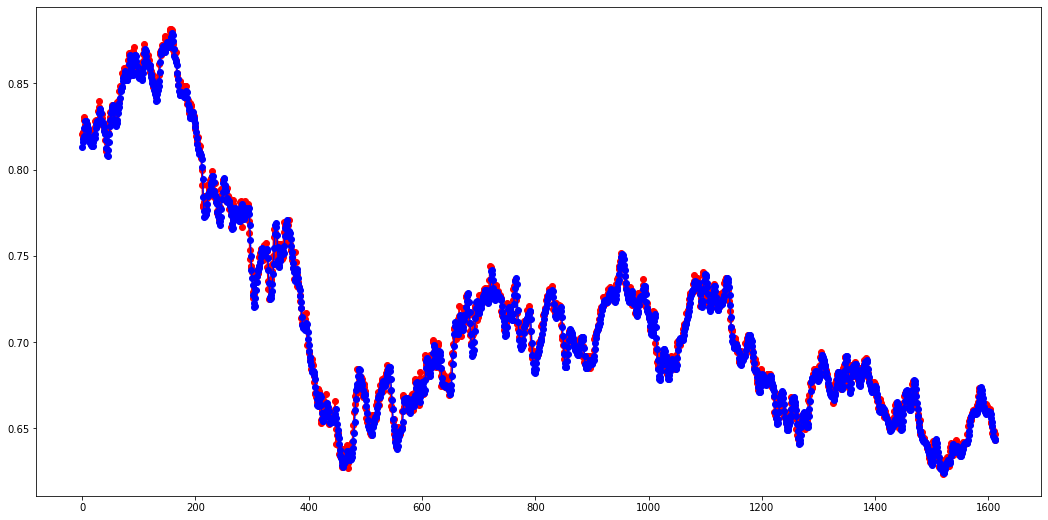

In [12]:
plt.figure(figsize=(18, 9))
plt.plot(test_data[30:], '-ro')
plt.plot(y_hat_inversed, '-bo')

In [13]:
print(train_data[-30:])

[[0.59850159]
 [0.60768085]
 [0.61656762]
 [0.62646518]
 [0.63676283]
 [0.65022345]
 [0.66636858]
 [0.68073705]
 [0.69311273]
 [0.70207341]
 [0.70694135]
 [0.71217958]
 [0.71761207]
 [0.72289511]
 [0.72776566]
 [0.73068981]
 [0.7354295 ]
 [0.73999634]
 [0.74357373]
 [0.74667756]
 [0.74923936]
 [0.75040993]
 [0.75327026]
 [0.75677112]
 [0.76205301]
 [0.7681734 ]
 [0.77664677]
 [0.78480558]
 [0.79175472]
 [0.79877336]]


In [14]:
pred_list = []

batch = train_data[-30:].reshape((1, 30, 1))

for i in range(30):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
print(batch.flatten())

[0.79066795 0.79242724 0.79216903 0.79019439 0.7866919  0.78182369
 0.77575773 0.76865762 0.7606734  0.75194544 0.74260426 0.73275465
 0.72249705 0.7119168  0.70109278 0.69009048 0.67897761 0.66781801
 0.65671527 0.64568835 0.63476753 0.62398314 0.61336583 0.60293019
 0.59268761 0.58264768 0.57280308 0.5631659  0.55373561 0.54450709]


In [15]:
#plt.plot(train_data[30:])
plt.plot(batch.flatten(), color='-r')

ValueError: Invalid RGBA argument: '-r'

<Figure size 432x288 with 1 Axes>

In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), 
                          index=df[-30:].index, columns=['Prediction'])
df_midpt = pd.DataFrame(mid_prices, columns=['Mid-point'])
df_test = pd.concat([df,df_midpt, df_predict], axis=1)
df_test

,date,high,low,open,close,Mid-point,Prediction
0,04/01/1971,1.1138,1.1138,1.1138,1.1138,0.036248,NaN
1,05/01/1971,1.1143,1.1143,1.1143,1.1143,0.068956,NaN
2,06/01/1971,1.1151,1.1151,1.1151,1.1151,0.098529,NaN
3,07/01/1971,1.1150,1.1150,1.1150,1.1150,0.125127,NaN
4,08/01/1971,1.1154,1.1154,1.1154,1.1154,0.149134,NaN
...,...,...,...,...,...,...,...
12638,03/02/2020,0.6477,0.6453,0.6465,0.6462,0.646500,0.774007
12639,04/02/2020,0.6502,0.6450,0.6462,0.6490,0.647600,0.771469
12640,05/02/2020,0.6503,0.6469,0.6490,0.6474,0.648600,0.768984
12641,06/02/2020,0.6484,0.6454,0.6474,0.6458,0.646900,0.766553


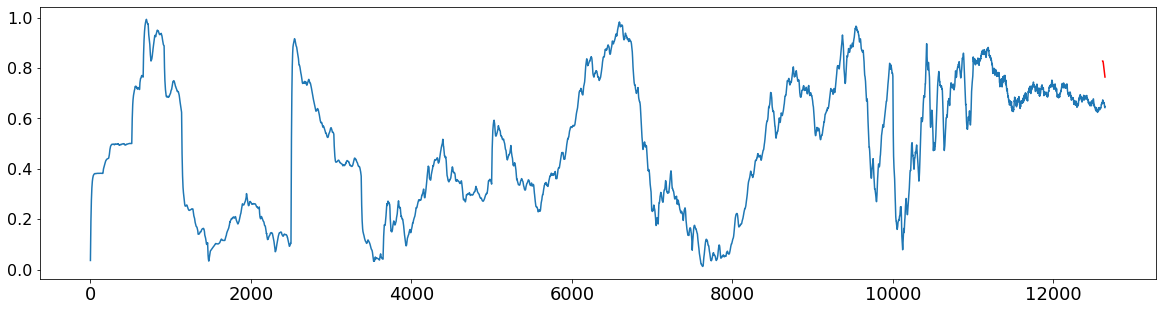

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Mid-point'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
#plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()


In [18]:
print(len(test_data))
print(len(y_hat_inversed))

1643
1613


In [19]:
y_recent = y_hat_inversed[-31:]
#print(y_recent)
y_recent2 = scaler.fit_transform(y_recent)
recent_generator = TimeseriesGenerator(y_recent2, y_recent2, length=30, batch_size=1)
for i in recent_generator:
    print(i)
# recent_hat = model.predict(recent_generator)
# recent_hat_inversed = scaler.inverse_transform(recent_hat)
# print(recent_hat_inversed)

(array([[[0.635376  ],
        [0.7183304 ],
        [0.8171158 ],
        [0.91744804],
        [0.98109436],
        [1.        ],
        [0.951704  ],
        [0.8780861 ],
        [0.7931423 ],
        [0.7111778 ],
        [0.62861633],
        [0.56251335],
        [0.5365925 ],
        [0.51049423],
        [0.4822979 ],
        [0.51340675],
        [0.5387058 ],
        [0.5412998 ],
        [0.5360756 ],
        [0.52471733],
        [0.52039146],
        [0.5309353 ],
        [0.496109  ],
        [0.4173336 ],
        [0.34071922],
        [0.25460243],
        [0.15840149],
        [0.07585526],
        [0.02830124],
        [0.01387024]]], dtype=float32), array([[0.]], dtype=float32))


In [20]:
model.save('nz.h5') 